# What's it take to be a Survivor?

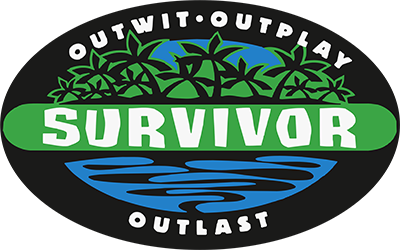

importing all of your important packages first...

In [2]:
import requests
from bs4 import BeautifulSoup as BS
from IPython.core.display import HTML
import pandas as pd
from datetime import datetime
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

set the theme...

In [3]:
colors = ['#3ba84f', '#2381ca', '#1b1e1c', '#757474', '#eef0ee']

In [4]:
all_szn_URL = 'https://en.wikipedia.org/wiki/Survivor_(American_TV_series)'

response = requests.get(all_szn_URL)

In [5]:
type(response)

requests.models.Response

check it out...

In [6]:
response.status_code

200

# nice :)

In [7]:
soup = BS(response.text)

In [8]:
soup.find('title').text

'Survivor (American TV series) - Wikipedia'

In [9]:
soup.find('table', attrs={'class' : 'wikitable'})

<table class="wikitable sortable" style="font-size:95%; text-align:center">
<caption>List of <i>Survivor</i> seasons
</caption>
<tbody><tr>
<th style="width:2%;">Season
</th>
<th style="width:15%;">Subtitle
</th>
<th style="width:20%;">Location
</th>
<th style="width:20%;">Original tribes
</th>
<th style="width:15%;">Winner
</th>
<th colspan="2" style="width:20%">Runner(s)-up
</th>
<th style="white-space:nowrap">Final vote
</th></tr>
<tr>
<th><a href="/wiki/Survivor:_Borneo" title="Survivor: Borneo">1</a>
</th>
<td><i>Borneo</i><sup class="reference" id="cite_ref-12"><a href="#cite_note-12">[c]</a></sup></td>
<td><a href="/wiki/Tiga_Island,_Malaysia" title="Tiga Island, Malaysia">Pulau Tiga</a>, <a href="/wiki/Sabah" title="Sabah">Sabah</a>, Malaysia</td>
<td rowspan="4">Two tribes of eight new players</td>
<td><a href="/wiki/Richard_Hatch_(Survivor_contestant)" title="Richard Hatch (Survivor contestant)">Richard Hatch</a></td>
<td colspan="2">Kelly Wiglesworth</td>
<td rowspan="2">4–3

# All Seasons

In [10]:
seasons_df = pd.read_html(str(soup.find('table', attrs={'class' : 'wikitable'})))[0]
seasons_df

,Season,Subtitle,Location,Original tribes,Winner,Runner(s)-up,Runner(s)-up.1,Final vote
0,1,Borneo[c],"Pulau Tiga, Sabah, Malaysia",Two tribes of eight new players,Richard Hatch,Kelly Wiglesworth,Kelly Wiglesworth,4–3
1,2,The Australian Outback,"Herbert River at Goshen Station, Queensland, A...",Two tribes of eight new players,Tina Wesson,Colby Donaldson,Colby Donaldson,4–3
2,3,Africa,"Shaba National Reserve, Kenya[10]",Two tribes of eight new players,Ethan Zohn,Kim Johnson,Kim Johnson,5–2
3,4,Marquesas,"Nuku Hiva, Marquesas Islands, French Polynesia",Two tribes of eight new players,Vecepia Towery,Neleh Dennis,Neleh Dennis,4–3
4,5,Thailand,"Ko Tarutao, Satun Province, Thailand",Two tribes of eight new players; picked by the...,Brian Heidik,Clay Jordan,Clay Jordan,4–3
5,6,The Amazon,"Rio Negro, Amazonas, Brazil",Two tribes of eight new players divided by gender,Jenna Morasca,Matthew Von Ertfelda,Matthew Von Ertfelda,6–1
6,7,Pearl Islands,"Pearl Islands, Panama",Two tribes of eight new players,Sandra Diaz-Twine,Lillian Morris,Lillian Morris,6–1
7,8,All-Stars,"Pearl Islands, Panama",Three tribes of six returning players,Amber Brkich,Rob Mariano,Rob Mariano,4–3
8,9,Vanuatu,"Efate, Shefa, Vanuatu",Two tribes of nine new players divided by gender,Chris Daugherty,Twila Tanner,Twila Tanner,5–2
9,10,Palau,"Koror, Palau",A schoolyard pick of two tribes of nine new pl...,Tom Westman,Katie Gallagher,Katie Gallagher,6–1


# All Seasons Ratings + Viewership

In [11]:
# grabbing ratings table on the page
tables = soup.find_all('table', attrs={'class': 'wikitable'})
second_table = tables[2]  

ratings_df = pd.read_html(str(second_table))[0]

ratings_df


Season   Timeslot (ET)[e]               Premiered  \
   Season   Timeslot (ET)[e]                    Date   
0       1  Wednesday 8:00 pm        May 31, 2000[33]   
1       2   Thursday 8:00 pm    January 28, 2001[36]   
2       3   Thursday 8:00 pm    October 11, 2001[39]   
3       4   Thursday 8:00 pm   February 28, 2002[42]   
4       5   Thursday 8:00 pm  September 19, 2002[45]   
5       6   Thursday 8:00 pm   February 13, 2003[48]   
6       7   Thursday 8:00 pm      September 18, 2003   
7       8   Thursday 8:00 pm        February 1, 2004   
8       9   Thursday 8:00 pm  September 16, 2004[54]   
9      10   Thursday 8:00 pm   February 17, 2005[56]   
10     11   Thursday 8:00 pm  September 15, 2005[59]   
11     12   Thursday 8:00 pm    February 2, 2006[62]   
12     13   Thursday 8:00 pm  September 14, 2006[64]   
13     14   Thursday 8:00 pm    February 8, 2007[66]   
14     15   Thursday 8:00 pm  September 20, 2007[67]   
15     16   Thursday 8:00 pm    February 7, 2008[69]   
16     17   Thursday 8:00 pm      September 25, 2008   
17     18   Thursday 8:00 pm       February 12, 2009   
18     19   Thursday 8:00 pm  September 17, 2009[74]   
19     20   Thursday 8:00 pm   February 11, 2010[78]   
20     21  Wednesday 8:00 pm  September 15, 2010[81]   
21     22  Wednesday 8:00 pm       February 16, 2011   
22     23  Wednesday 8:00 pm  September 14, 2011[87]   
23     24  Wednesday 8:00 pm       February 15, 2012   
24     25  Wednesday 8:00 pm  September 19, 2012[93]   
25     26  Wednesday 8:00 pm       February 13, 2013   
26     27  Wednesday 8:00 pm      September 18, 2013   
27     28  Wednesday 8:00 pm       February 26, 2014   
28     29  Wednesday 8:00 pm      September 24, 2014   
29     30  Wednesday 8:00 pm       February 25, 2015   
30     31  Wednesday 8:00 pm      September 23, 2015   
31     32  Wednesday 8:00 pm       February 17, 2016   
32     33  Wednesday 8:00 pm      September 21, 2016   
33     34  Wednesday 8:00 pm           March 8, 2017   
34     35  Wednesday 8:00 pm      September 27, 2017   
35     36  Wednesday 8:00 pm       February 28, 2018   
36     37  Wednesday 8:00 pm      September 26, 2018   
37     38  Wednesday 8:00 pm       February 20, 2019   
38     39  Wednesday 8:00 pm      September 25, 2019   
39     40  Wednesday 8:00 pm       February 12, 2020   
40     41  Wednesday 8:00 pm      September 22, 2021   
41     42  Wednesday 8:00 pm           March 9, 2022   
42     43  Wednesday 8:00 pm      September 21, 2022   
43     44  Wednesday 8:00 pm           March 1, 2023   

                                                   Ended  \
   Premiere viewers (in millions)                   Date   
0                           15.51        August 23, 2000   
1                        45.37[f]        May 3, 2001[37]   
2                           23.84   January 10, 2002[40]   
3                           23.19       May 19, 2002[43]   
4                           23.05  December 19, 2002[46]   
5                           23.26       May 11, 2003[49]   
6                           21.50  December 14, 2003[50]   
7                        33.53[f]        May 9, 2004[52]   
8                           20.06  December 12, 2004[55]   
9                           23.66       May 15, 2005[57]   
10                          18.41  December 11, 2005[60]   
11                          19.20           May 14, 2006   
12                          18.00      December 17, 2006   
13                          16.68           May 13, 2007   
14                          15.35      December 16, 2007   
15                          14.02           May 11, 2008   
16                      13.05[70]      December 14, 2008   
17                      13.63[72]           May 17, 2009   
18                      11.66[75]      December 20, 2009   
19                      14.15[79]           May 16, 2010   
20                      12.23[82]      December 19, 2010   
21                      11.17[85]           Ma

# Creating empty lists for overall contestants, challenge winners, & eliminations

In [12]:
all_contestants = []
all_challenge_winners_eliminations = []

# Season 1

In [13]:
szn_1_URL = 'https://en.wikipedia.org/wiki/Survivor:_Borneo'

response1 = requests.get(szn_1_URL)
response1.status_code

200

In [14]:
soup1 = BS(response1.text)
soup1.find('table', attrs={'class' : 'wikitable'})

<table class="wikitable sortable" style="margin:auto; text-align:center">
<caption>List of <i>Survivor: Borneo</i> contestants
</caption>
<tbody><tr>
<th rowspan="2" scope="col">Contestant
</th>
<th rowspan="2" scope="col">Age
</th>
<th class="unsortable" rowspan="2" scope="col">From
</th>
<th colspan="2" scope="colgroup">Tribe
</th>
<th colspan="2" scope="colgroup">Finish
</th></tr>
<tr>
<th scope="col">Original
</th>
<th class="unsortable" scope="col">Merged
</th>
<th class="unsortable" scope="col">Placement
</th>
<th class="unsortable" scope="col">Day
</th></tr>
<tr>
<th scope="row" style="text-align:left"><span data-sort-value="Christopher, Sonja"><span class="vcard"><span class="fn">Sonja Christopher</span></span></span>
</th>
<td>63
</td>
<td><a href="/wiki/Walnut_Creek,_California" title="Walnut Creek, California">Walnut Creek,<br/>California</a>
</td>
<td style="background:#ff6600; color:white;">Tagi
</td>
<td bgcolor="darkgray" rowspan="6">
</td>
<td>1st voted out
</td>
<td>Da

In [15]:
# getting contestants table and appending a column to classify the season
contestants_df_szn1 = pd.read_html(str(soup1.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn1['Season'] = 'Season 1'
contestants_df_szn1.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn1)

contestants_df_szn1

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season
0,Sonja Christopher,63,"Walnut Creek, California",Tagi,NaN,1st voted out,Day 3,Season 1
1,B.B. Andersen,64,"Mission Hills, Kansas",Pagong,NaN,2nd voted out,Day 6,Season 1
2,Stacey Stillman,27,"San Francisco, California",Tagi,NaN,3rd voted out,Day 9,Season 1
3,Ramona Gray,29,"Edison, New Jersey",Pagong,NaN,4th voted out,Day 12,Season 1
4,Dirk Been,23,"Spring Green, Wisconsin",Tagi,NaN,5th voted out,Day 15,Season 1
5,Joel Klug,27,"Sherwood, Arkansas",Pagong,NaN,6th voted out,Day 18,Season 1
6,Gretchen Cordy,38,"Clarksville, Tennessee",Pagong,Rattana,7th voted out,Day 21,Season 1
7,Greg Buis,24,"Gold Hill, Colorado",Pagong,Rattana,8th voted out 1st jury member,Day 24,Season 1
8,Jenna Lewis,22,"Franklin, New Hampshire",Pagong,Rattana,9th voted out 2nd jury member,Day 27,Season 1
9,Gervase Peterson,30,"Willingboro, New Jersey",Pagong,Rattana,10th voted out 3rd jury member,Day 30,Season 1


# Season 1 Challenge Winners + Eliminations

In [16]:
# grabbing 2nd table on challenges and winners and appending a column to classify the season
tables = soup1.find_all('table', attrs={'class': 'wikitable'})
second_table = tables[1]  
challenge_winners_eliminations_1 = pd.read_html(str(second_table))[0]
challenge_winners_eliminations_1['Season'] = 'Season 1'
all_challenge_winners_eliminations.append(challenge_winners_eliminations_1)
challenge_winners_eliminations_1

Episode                                             Challenge winner(s)  \
       No.                      Title         Air date              Reward   
0        1            "The Marooning"     May 31, 2000              Pagong   
1        2       "The Generation Gap"     June 7, 2000           Pagong[a]   
2        3           "Quest for Food"    June 14, 2000                Tagi   
3        4    "Too Little, Too Late?"    June 21, 2000                Tagi   
4        5  "Pulling Your Own Weight"    June 28, 2000              Pagong   
5        6            "Udder Revenge"     July 5, 2000              Pagong   
6        7               "The Merger"    July 12, 2000             None[b]   
7        8    "Thy Name Is Duplicity"    July 19, 2000                Greg   
8        9        "Old and New Bonds"    July 26, 2000     Colleen [Jenna]   
9       10    "Crack in the Alliance"   August 2, 2000             Gervase   
10      11           "Long Hard Days"   August 9, 2000      Sean [Richard]   
11      12     "Death of an Alliance"  August 16, 2000               Kelly   
12      13           "The Final Four"  August 23, 2000                None   
13      13           "The Final Four"  August 23, 2000                None   
14      13           "The Final Four"  August 23, 2000                 NaN   
15      14              "The Reunion"  August 23, 2000                 NaN   

            Eliminated              Season  
   Immunity      Tribe    Player            
0    Pagong       Tagi     Sonja  Season 1  
1      Tagi     Pagong      B.B.  Season 1  
2    Pagong       Tagi    Stacey  Season 1  
3      Tagi     Pagong    Ramona  Season 1  
4    Pagong       Tagi      Dirk  Season 1  
5      Tagi     Pagong      Joel  Season 1  
6      Greg    Rattana  Gretchen  Season 1  
7   Gervase    Rattana      Greg  Season 1  
8      Rudy    Rattana     Jenna  Season 1  
9   Richard    Rattana   Gervase  Season 1  
10    Kelly    Rattana   Colleen  Season 1  
11    Kelly    Rattana      Sean  Season 1  
12    Kelly    Rattana     Susan  Season 1  
13    Kelly    Rattana      Rudy  Season 1  
14      NaN        NaN       NaN  Season 1  
15      NaN        NaN       NaN  Season 1

# Season 2

In [31]:
szn_2_URL = 'https://en.wikipedia.org/wiki/Survivor:_The_Australian_Outback'
response2 = requests.get(szn_2_URL)


soup2 = BS(response2.text)
soup2.find('table', attrs={'class' : 'wikitable'})

<table class="wikitable sortable" style="margin:auto; text-align:center">
<caption>List of <i>Survivor: The Australian Outback</i> contestants
</caption>
<tbody><tr>
<th rowspan="2" scope="col">Contestant
</th>
<th rowspan="2" scope="col">Age
</th>
<th class="unsortable" rowspan="2" scope="col">From
</th>
<th colspan="2" scope="colgroup">Tribe
</th>
<th colspan="2">Finish
</th></tr>
<tr>
<th scope="col">Original
</th>
<th class="unsortable" scope="col">Merged
</th>
<th class="unsortable" scope="col">Placement
</th>
<th class="unsortable" scope="col">Day
</th></tr>
<tr>
<th scope="row" style="text-align:left"><span data-sort-value="Eaton, Debb"><span class="vcard"><span class="fn">Debb Eaton</span></span></span>
</th>
<td>45
</td>
<td><a href="/wiki/Milan,_New_Hampshire" title="Milan, New Hampshire">Milan,<br/>New Hampshire</a>
</td>
<td style="background:#0099cc; color:white;">Kucha
</td>
<td rowspan="6" style="background:darkgrey;">
</td>
<td>1st voted out
</td>
<td>Day 3
</td></tr>
<

In [32]:
contestants_df_szn2 = pd.read_html(str(soup2.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn2['Season'] = 'Season 2'
contestants_df_szn2.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn2)

contestants_df_szn2

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season
0,Debb Eaton,45,"Milan, New Hampshire",Kucha,NaN,1st voted out,Day 3,Season 2
1,Kel Gleason,32,"Fort Hood, Texas",Ogakor,NaN,2nd voted out,Day 6,Season 2
2,Maralyn Hershey,51,"Wakefield, Virginia",Ogakor,NaN,3rd voted out,Day 9,Season 2
3,Mitchell Olson,23,"Union City, New Jersey",Ogakor,NaN,4th voted out,Day 12,Season 2
4,Kimmi Kappenberg,27,"Ronkonkoma, New York",Kucha,NaN,5th voted out,Day 15,Season 2
5,Michael Skupin,38,"White Lake, Michigan",Kucha,NaN,Medically evacuated,Day 17,Season 2
6,Jeff Varner,34,"Manhattan, New York",Kucha,Barramundi,6th voted out,Day 21,Season 2
7,Alicia Calaway,32,"Manhattan, New York",Kucha,Barramundi,7th voted out 1st jury member,Day 24,Season 2
8,Jerri Manthey,30,"Los Angeles, California",Ogakor,Barramundi,8th voted out 2nd jury member,Day 27,Season 2
9,Nick Brown,23,"Steilacoom, Washington",Kucha,Barramundi,9th voted out 3rd jury member,Day 30,Season 2


# Season 2 Challenge Winners + Eliminations

In [33]:
# grabbing 2nd table on challenges and winners and appending a column to classify the season
tables2 = soup2.find_all('table', attrs={'class': 'wikitable'})
second_table2 = tables2[1]  
challenge_winners_eliminations2 = pd.read_html(str(second_table2))[0]
challenge_winners_eliminations2['Season'] = 'Season 2'
all_challenge_winners_eliminations.append(challenge_winners_eliminations2)
challenge_winners_eliminations2

Episode                                             Challenge winner(s)  \
       No.                    Title  Original air date              Reward   
0        1               "Stranded"   January 28, 2001              Ogakor   
1        2              "Suspicion"   February 1, 2001              Ogakor   
2        3           "Trust No One"   February 8, 2001              Ogakor   
3        4     "The Killing Fields"  February 15, 2001               Kucha   
4        5    "The Gloves Come Off"  February 22, 2001               Kucha   
5        6          "Trial By Fire"      March 1, 2001               Kucha   
6        7              "The Merge"      March 8, 2001             None[b]   
7        8               "Friends?"     March 14, 2001       Jerri [Amber]   
8        9      "The First 24 Days"     March 21, 2001       Recap Episode   
9       10      "Honeymoon or Not?"     March 29, 2001        Colby, Jerri   
10      11      "Let's Make a Deal"      April 5, 2001    Survivor Auction   
11      12  "No Longer Just a Game"     April 12, 2001               Colby   
12      13       "Enough Is Enough"     April 19, 2001                Tina   
13      14         "The Final Four"     April 26, 2001               Colby   
14      15     "The Most Deserving"        May 3, 2001                None   
15      16            "The Reunion"        May 3, 2001                 NaN   

                      Eliminated                   Season  
         Immunity          Tribe         Player            
0          Ogakor          Kucha           Debb  Season 2  
1           Kucha         Ogakor            Kel  Season 2  
2           Kucha         Ogakor        Maralyn  Season 2  
3           Kucha         Ogakor       Mitchell  Season 2  
4          Ogakor          Kucha          Kimmi  Season 2  
5         None[a]          Kucha        Michael  Season 2  
6           Keith     Barramundi           Jeff  Season 2  
7           Keith     Barramundi         Alicia  Season 2  
8   Recap Episode  Recap Episode  Recap Episode  Season 2  
9            Nick     Barramundi          Jerri  Season 2  
10          Colby     Barramundi           Nick  Season 2  
11          Colby     Barramundi          Amber  Season 2  
12          Colby     Barramundi         Rodger  Season 2  
13          Colby     Barramundi      Elisabeth  Season 2  
14          Colby     Barramundi          Keith  Season 2  
15            NaN            NaN            NaN  Season 2

# Season 3 

In [34]:
# first I get the url and pass it to requests.get
szn_3_URL = 'https://en.wikipedia.org/wiki/Survivor:_Africa'
response3 = requests.get(szn_3_URL)
soup3 = BS(response3.text)

contestants_df_szn3 = pd.read_html(str(soup3.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn3['Season'] = 'Season 3'
contestants_df_szn3.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn3)

contestants_df_szn3

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Diane Ogden,42,"Lincoln, Nebraska",Boran,NaN,NaN,1st voted out,Day 3,Season 3
1,Jessie Camacho,26,"Orlando, Florida",Boran,NaN,NaN,2nd voted out,Day 6,Season 3
2,Carl Bilancione,46,"Winter Springs, Florida",Samburu,NaN,NaN,3rd voted out,Day 9,Season 3
3,Linda Spencer,44,"Boston, Massachusetts",Samburu,NaN,NaN,4th voted out,Day 12,Season 3
4,Silas Gaither,23,"Los Angeles, California",Samburu,Boran,NaN,5th voted out,Day 15,Season 3
5,Lindsey Richter,26,"Portland, Oregon",Samburu,Samburu,NaN,6th voted out,Day 18,Season 3
6,Clarence Black,24,"Detroit, Michigan",Boran,Boran,Moto Maji,7th voted out,Day 21,Season 3
7,Kelly Goldsmith,22,"San Diego, California",Boran,Samburu,Moto Maji,8th voted out 1st jury member,Day 24,Season 3
8,Brandon Quinton,25,"Dallas, Texas",Samburu,Samburu,Moto Maji,9th voted out 2nd jury member,Day 27,Season 3
9,Frank Garrison,43,"Odessa, New York",Samburu,Boran,Moto Maji,10th voted out 3rd jury member,Day 30,Season 3


# Season 3 Challenge Winners + Eliminations

In [23]:
# grabbing 2nd table on challenges and winners and appending a column to classify the season
tables3 = soup3.find_all('table', attrs={'class': 'wikitable'})
second_table3 = tables3[1]  
challenge_winners_eliminations3 = pd.read_html(str(second_table3))[0]
challenge_winners_eliminations3['Season'] = 'Season 3'
all_challenge_winners_eliminations.append(challenge_winners_eliminations3)
challenge_winners_eliminations3

Episode                                                       \
       No.                             Title  Original air date   
0        1               "Question of Trust"   October 11, 2001   
1        2             "Who's Zooming Whom?"   October 18, 2001   
2        3              "The Gods Are Angry"   October 25, 2001   
3        4         "The Young and Untrusted"   November 1, 2001   
4        5                       "The Twist"   November 8, 2001   
5        6          "I'd Never Do It To You"  November 15, 2001   
6        7  "Will There Be a Feast Tonight?"  November 22, 2001   
7        8               "The First 21 Days"  November 29, 2001   
8        9           "Smoking Out the Snake"   December 6, 2001   
9       10    "Dinner, Movie and a Betrayal"  December 13, 2001   
10      11                   "We Are Family"  December 20, 2001   
11      12               "The Big Adventure"  December 27, 2001   
12      13                   "Truth Be Told"    January 3, 2002   
13      14      "The Final Four: No Regrets"   January 10, 2002   
14      14      "The Final Four: No Regrets"   January 10, 2002   
15      15                     "The Reunion"   January 10, 2002   

   Challenge winner(s)                    Eliminated                   Season  
                Reward       Immunity          Tribe         Player            
0              Samburu        Samburu          Boran          Diane  Season 3  
1              Samburu        Samburu          Boran         Jessie  Season 3  
2                Boran          Boran        Samburu           Carl  Season 3  
3              Samburu          Boran        Samburu          Linda  Season 3  
4                Boran        Samburu          Boran          Silas  Season 3  
5              Samburu          Boran        Samburu        Lindsey  Season 3  
6              None[a]         Teresa      Moto Maji       Clarence  Season 3  
7        Recap Episode  Recap Episode  Recap Episode  Recap Episode  Season 3  
8          Ethan [Lex]          Ethan      Moto Maji          Kelly  Season 3  
9       Brandon, Frank            Lex      Moto Maji        Brandon  Season 3  
10    Survivor Auction            Lex      Moto Maji          Frank  Season 3  
11           Lex [Tom]            Tom      Moto Maji         Kim P.  Season 3  
12                 Lex            Lex      Moto Maji         Teresa  Season 3  
13                None         Kim J.      Moto Maji            Tom  Season 3  
14                None         Kim J.      Moto Maji            Lex  Season 3  
15                 NaN            NaN            NaN            NaN  Season 3

# Season 4

In [35]:
# first I get the url and pass it to requests.get
szn_4_URL = 'https://en.wikipedia.org/wiki/Survivor:_Marquesas'
response4 = requests.get(szn_4_URL)
soup4 = BS(response4.text)

contestants_df_szn4 = pd.read_html(str(soup4.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn4['Season'] = 'Season 4'
contestants_df_szn4.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn4)

contestants_df_szn4

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Peter Harkey,44,"Millis, Massachusetts",Maraamu,NaN,NaN,1st voted out,Day 3,Season 4
1,Patricia Jackson,49,"Lugoff, South Carolina",Maraamu,NaN,NaN,2nd voted out,Day 6,Season 4
2,Hunter Ellis,33,"La Jolla, California",Maraamu,NaN,NaN,3rd voted out,Day 9,Season 4
3,Sarah Jones,24,"Newport Beach, California",Maraamu,Maraamu,NaN,4th voted out,Day 12,Season 4
4,Gabriel Cade,23,"Hollywood, California",Rotu,Rotu,NaN,5th voted out,Day 15,Season 4
5,Gina Crews,28,"Gainesville, Florida",Maraamu,Maraamu,NaN,6th voted out,Day 18,Season 4
6,Rob Mariano,25,"Canton, Massachusetts",Maraamu,Rotu,Soliantu,7th voted out,Day 21,Season 4
7,John Carroll,36,"Omaha, Nebraska",Rotu,Rotu,Soliantu,8th voted out 1st jury member,Day 24,Season 4
8,Zoe Zanidakis,35,"Monhegan, Maine",Rotu,Rotu,Soliantu,9th voted out 2nd jury member,Day 27,Season 4
9,Tammy Leitner,29,"Mesa, Arizona",Rotu,Rotu,Soliantu,10th voted out 3rd jury member,Day 30,Season 4


# Season 4 Challenge Winners + Eliminations

In [25]:
# grabbing 2nd table on challenges and winners and appending a column to classify the season
tables4 = soup4.find_all('table', attrs={'class': 'wikitable'})
second_table4 = tables4[1]  
challenge_winners_eliminations4 = pd.read_html(str(second_table4))[0]
challenge_winners_eliminations4['Season'] = 'Season 4'
all_challenge_winners_eliminations.append(challenge_winners_eliminations4)
challenge_winners_eliminations4

Episode                                                       \
       No.                             Title  Original air date   
0        1               "Back to the Beach"  February 28, 2002   
1        2                     "Nacho Momma"      March 7, 2002   
2        3                "No Pain, No Gain"     March 13, 2002   
3        4                 "The Winds Twist"     March 20, 2002   
4        5            "The End of Innocence"     March 28, 2002   
5        6                   "The Underdogs"      April 4, 2002   
6        7                       "True Lies"     April 11, 2002   
7        8                      "Jury's Out"     April 18, 2002   
8        9  "Look Closer: The First 24 Days"     April 24, 2002   
9       10               "Two Peas in a Pod"     April 25, 2002   
10      11                    "The Princess"        May 2, 2002   
11      12              "Marquesan Vacation"        May 9, 2002   
12      13            "A Tale of Two Cities"       May 16, 2002   
13      14               "The Sole Survivor"       May 19, 2002   
14      14               "The Sole Survivor"       May 19, 2002   
15      15                     "The Reunion"       May 19, 2002   

   Challenge winner(s)                    Eliminated                   Season  
                Reward       Immunity          Tribe         Player            
0                 None           Rotu        Maraamu          Peter  Season 4  
1                 Rotu           Rotu        Maraamu       Patricia  Season 4  
2                 Rotu           Rotu        Maraamu         Hunter  Season 4  
3              None[a]           Rotu        Maraamu          Sarah  Season 4  
4              Maraamu        Maraamu           Rotu        Gabriel  Season 4  
5              Maraamu           Rotu        Maraamu           Gina  Season 4  
6              None[b]          Kathy       Soliantu            Rob  Season 4  
7                Kathy          Tammy       Soliantu           John  Season 4  
8        Recap Episode  Recap Episode  Recap Episode  Recap Episode  Season 4  
9        Paschal, Sean          Tammy       Soliantu            Zoe  Season 4  
10     Paschal [Neleh]         Robert       Soliantu          Tammy  Season 4  
11            Kathy[c]        Vecepia       Soliantu         Robert  Season 4  
12                Sean          Kathy       Soliantu           Sean  Season 4  
13                None        Vecepia       Soliantu        Paschal  Season 4  
14                None          Neleh       Soliantu          Kathy  Season 4  
15                 NaN            NaN            NaN            NaN  Season 4

# Season 5

In [36]:
# first I get the url and pass it to requests.get
szn_5_URL = 'https://en.wikipedia.org/wiki/Survivor:_Thailand'
response5 = requests.get(szn_5_URL)
soup5 = BS(response5.text)

contestants_df_szn5 = pd.read_html(str(soup5.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn5['Season'] = 'Season 5'
contestants_df_szn5.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn5)

contestants_df_szn5

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season
0,John Raymond,40,"Slidell, Louisiana",Chuay Gahn,NaN,1st voted out,Day 3,Season 5
1,Tanya Vance,27,"Gray, Tennessee",Chuay Gahn,NaN,2nd voted out,Day 6,Season 5
2,Jed Hildebrand,25,"Dallas, Texas",Sook Jai,NaN,3rd voted out,Day 9,Season 5
3,Ghandia Johnson,33,"Denver, Colorado",Chuay Gahn,NaN,4th voted out,Day 12,Season 5
4,Stephanie Dill,29,"Ozark, Arkansas",Sook Jai,NaN,5th voted out,Day 15,Season 5
5,Robb Zbacnik,23,"Scottsdale, Arizona",Sook Jai,NaN,6th voted out,Day 18,Season 5
6,Shii Ann Huang,28,"New York, New York",Sook Jai,NaN,7th voted out,Day 21,Season 5
7,Erin Collins,26,"Austin, Texas",Sook Jai,NaN,8th voted out 1st jury member,Day 24,Season 5
8,Ken Stafford,30,"Brooklyn, New York",Sook Jai,Chuay Jai,9th voted out 2nd jury member,Day 27,Season 5
9,Penny Ramsey,27,"Plano, Texas",Sook Jai,Chuay Jai,10th voted out 3rd jury member,Day 30,Season 5


# Season 5 Challenge Winners + Eliminations

In [27]:
tables5 = soup5.find_all('table', attrs={'class': 'wikitable'})
second_table5 = tables5[1]  
challenge_winners_eliminations5 = pd.read_html(str(second_table5))[0]
challenge_winners_eliminations5['Season'] = 'Season 5'
all_challenge_winners_eliminations.append(challenge_winners_eliminations5)
challenge_winners_eliminations5

Episode                                                        \
       No.                             Title   Original air date   
0        1  "The Importance of Being Eldest"  September 19, 2002   
1        2                "The Great Divide"  September 26, 2002   
2        3                   "Family Values"     October 3, 2002   
3        4                   "Gender Bender"    October 10, 2002   
4        5            "The Ocean's Surprise"    October 17, 2002   
5        6                "The Power of One"    October 24, 2002   
6        7                     "Assumptions"    October 31, 2002   
7        8         "Sleeping with the Enemy"    November 7, 2002   
8        9              "Desperate Measures"   November 14, 2002   
9       10         "While the Cats are Away"   November 21, 2002   
10      11               "The First 30 Days"   November 27, 2002   
11      12   "A Big Surprise... and Another"    December 5, 2002   
12      13           "The Tides are Turning"   December 12, 2002   
13      14       "Slip Through Your Fingers"   December 19, 2002   
14      14       "Slip Through Your Fingers"   December 19, 2002   
15      15                     "The Reunion"   December 19, 2002   

   Challenge winner(s)                    Eliminated                   Season  
                Reward       Immunity          Tribe         Player            
0                 None       Sook Jai     Chuay Gahn           John  Season 5  
1             Sook Jai       Sook Jai     Chuay Gahn          Tanya  Season 5  
2           Chuay Gahn     Chuay Gahn       Sook Jai            Jed  Season 5  
3             Sook Jai       Sook Jai     Chuay Gahn        Ghandia  Season 5  
4     Survivor Auction     Chuay Gahn       Sook Jai      Stephanie  Season 5  
5             Sook Jai     Chuay Gahn       Sook Jai           Robb  Season 5  
6                 None     Chuay Gahn       Sook Jai       Shii Ann  Season 5  
7                 None     Chuay Gahn       Sook Jai           Erin  Season 5  
8                Brian           Clay      Chuay Jai            Ken  Season 5  
9         Brian [Clay]          Helen      Chuay Jai          Penny  Season 5  
10       Recap Episode  Recap Episode  Recap Episode  Recap Episode  Season 5  
11            Helen[a]         Ted[b]      Chuay Jai           Jake  Season 5  
12         Ted [Helen]          Brian      Chuay Jai            Ted  Season 5  
13                None          Brian      Chuay Jai          Helen  Season 5  
14                None          Brian      Chuay Jai            Jan  Season 5  
15                 NaN            NaN            NaN            NaN  Season 5

# Season 6

In [37]:
szn_6_URL = 'https://en.wikipedia.org/wiki/Survivor:_The_Amazon'
response6 = requests.get(szn_6_URL)
soup6 = BS(response6.text)

contestants_df_szn6 = pd.read_html(str(soup6.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn6['Season'] = 'Season 6'
contestants_df_szn6.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn6)

contestants_df_szn6

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Ryan Aiken,23,"Ellicott City, Maryland",Tambaqui,NaN,NaN,1st voted out,Day 3,Season 6
1,Janet Koth,46,"Manchester, Missouri",Jaburu,NaN,NaN,2nd voted out,Day 6,Season 6
2,Daniel Lue,26,"Houston, Texas",Tambaqui,NaN,NaN,3rd voted out,Day 9,Season 6
3,JoAnna Ward,31,"Orangeburg, South Carolina",Jaburu,NaN,NaN,4th voted out,Day 12,Season 6
4,Jeanne Hebert,40,"North Attleborough, Massachusetts",Jaburu,Tambaqui,NaN,5th voted out,Day 15,Season 6
5,Shawna Mitchell,23,"Los Angeles, California",Jaburu,Jaburu,NaN,6th voted out,Day 18,Season 6
6,Roger Sexton,56,"Valencia, California",Tambaqui,Tambaqui,Jacaré,7th voted out,Day 21,Season 6
7,Dave Johnson,23,"Pasadena, California",Tambaqui,Tambaqui,Jacaré,8th voted out 1st jury member,Day 24,Season 6
8,Deena Bennett,35,"Riverside, California",Jaburu,Jaburu,Jacaré,9th voted out 2nd jury member,Day 27,Season 6
9,Alex Bell,32,"Los Angeles, California",Tambaqui,Jaburu,Jacaré,10th voted out 3rd jury member,Day 30,Season 6


# Season 6 Challenge Winners + Eliminations

In [29]:
tables6 = soup6.find_all('table', attrs={'class': 'wikitable'})
second_table6 = tables6[1]  
challenge_winners_eliminations6 = pd.read_html(str(second_table6))[0]
challenge_winners_eliminations6['Season'] = 'Season 6'
all_challenge_winners_eliminations.append(challenge_winners_eliminations6)
challenge_winners_eliminations6

Episode                                                    \
       No.                          Title  Original air date   
0        1               "Boys vs. Girls"  February 13, 2003   
1        2                       "Storms"  February 20, 2003   
2        3                   "Girl Power"  February 27, 2003   
3        4                      "Trapped"      March 6, 2003   
4        5               "Pick-up Sticks"     March 13, 2003   
5        6      "More Than Meats the Eye"     March 19, 2003   
6        7            "Girls Gone Wilder"     March 26, 2003   
7        8      "Sleeping With the Enemy"      April 3, 2003   
8        9                    "The Chain"     April 10, 2003   
9       10                 "Amazon Redux"     April 17, 2013   
10      11                      "Q and A"     April 24, 2003   
11      12                  "Sour Grapes"        May 1, 2003   
12      13          "The Amazon Heats Up"        May 8, 2003   
13      14  "...And Then There Were Four"       May 11, 2003   
14      14  "...And Then There Were Four"       May 11, 2003   
15      15                  "The Reunion"       May 11, 2003   

                            Challenge winner(s)                    \
                                         Reward          Immunity   
0                                          None            Jaburu   
1                                        Jaburu          Tambaqui   
2                                        Jaburu            Jaburu   
3                                      Tambaqui          Tambaqui   
4                                       None[a]            Jaburu   
5                                      Tambaqui          Tambaqui   
6                                       None[b]             Deena   
7                                  Dave [Deena]             Jenna   
8                                  Alex [Jenna]           Matthew   
9                                 Recap Episode     Recap Episode   
10                             Survivor Auction               Rob   
11  Matthew [Butch, Christy, Heidi, Jenna, Rob]  Jenna (Heidi)[c]   
12                                Matthew [Rob]           Matthew   
13                                         None             Jenna   
14                                         None             Jenna   
15                                          NaN               NaN   

       Eliminated                   Season  
            Tribe         Player            
0        Tambaqui           Ryan  Season 6  
1          Jaburu          Janet  Season 6  
2        Tambaqui         Daniel  Season 6  
3          Jaburu         JoAnna  Season 6  
4        Tambaqui         Jeanne  Season 6  
5          Jaburu         Shawna  Season 6  
6          Jacaré          Roger  Season 6  
7          Jacaré           Dave  Season 6  
8          Jacaré          Deena  Season 6  
9   Recap Episode  Recap Episode  Season 6  
10         Jacaré           Alex  Season 6  
11         Jacaré        Christy  Season 6  
12         Jacaré          Heidi  Season 6  
13         Jacaré          Butch  Season 6  
14         Jacaré            Rob  Season 6  
15            NaN            NaN  Season 6

# Season 7

In [38]:
szn_7_URL = 'https://en.wikipedia.org/wiki/Survivor:_Pearl_Islands'
response7 = requests.get(szn_7_URL)
soup7 = BS(response7.text)

contestants_df_szn7 = pd.read_html(str(soup7.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn7['Season'] = 'Season 7'
contestants_df_szn7.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn7)

contestants_df_szn7

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Nicole Delma,24,"Hermosa Beach, California",Morgan,Outcasts,NaN,1st voted out,Day 3,Season 7
1,Ryan Shoulders,23,"Clarksville, Tennessee",Morgan,Outcasts,NaN,2nd voted out,Day 6,Season 7
2,Lillian Morris (Returned to game),Lillian Morris (Returned to game),Lillian Morris (Returned to game),Morgan,Outcasts,NaN,3rd voted out[a],Day 9,Season 7
3,Burton Roberts (Returned to game),Burton Roberts (Returned to game),Burton Roberts (Returned to game),Drake,Outcasts,NaN,4th voted out[a],Day 12,Season 7
4,Michelle Tesauro,22,"Washington, D.C.",Drake,Outcasts,NaN,5th voted out,Day 15,Season 7
5,Trish Dunn,42,"Annapolis, Maryland",Drake,Outcasts,NaN,6th voted out,Day 18,Season 7
6,Shawn Cohen,28,"Hollywood, California",Drake,NaN,NaN,7th voted out,Day 19,Season 7
7,Osten Taylor,27,"Boston, Massachusetts",Morgan,NaN,NaN,Quit,Day 19,Season 7
8,Andrew Savage,39,"Chicago, Illinois",Morgan,NaN,Balboa,8th voted out,Day 21,Season 7
9,Ryan Opray,30,"Los Gatos, California",Morgan,NaN,Balboa,9th voted out 1st jury member,Day 24,Season 7


# Season 7 Challenge Winners + Eliminations

In [39]:
tables7 = soup7.find_all('table', attrs={'class': 'wikitable'})
second_table7 = tables7[1]  
challenge_winners_eliminations7 = pd.read_html(str(second_table7))[0]
challenge_winners_eliminations7['Season'] = 'Season 7'
all_challenge_winners_eliminations.append(challenge_winners_eliminations7)
challenge_winners_eliminations7

Episode                                                         \
       No.                              Title   Original air date   
0        1               "Beg, Barter, Steal"  September 18, 2003   
1        2           "To Quit or Not to Quit"  September 25, 2003   
2        3  "United We Stand, Divided We...?"     October 2, 2003   
3        4   "Pick a Castaway...Any Castaway"     October 9, 2003   
4        4   "Pick a Castaway...Any Castaway"     October 9, 2003   
5        5                  "Everyone's Hero"    October 16, 2003   
6        6                  "Me and My Snake"    October 23, 2003   
7        7             "What the...?, Part 1"    October 30, 2003   
8        7             "What the...?, Part 1"    October 30, 2003   
9        8             "What the...?, Part 2"    November 6, 2003   
10       8             "What the...?, Part 2"    November 6, 2003   
11       8             "What the...?, Part 2"    November 6, 2003   
12       9       "Shocking! Simply Shocking!"   November 13, 2003   
13      10             "Swimming With Sharks"   November 20, 2003   
14      11                    "The Great Lie"   November 26, 2003   
15      12    "Would You Be My Brutus Today?"    December 4, 2003   
16      13                           "Mutiny"   December 11, 2003   
17      14             "Flames and Endurance"   December 14, 2003   
18      14             "Flames and Endurance"   December 14, 2003   
19      15                          "Reunion"   December 14, 2003   

             Challenge winner(s)                     Eliminated            \
                          Reward            Immunity      Tribe    Player   
0                           None               Drake     Morgan    Nicole   
1                          Drake               Drake     Morgan   Ryan S.   
2                          Drake               Drake     Morgan   Lillian   
3                          Drake              Morgan      Drake    Burton   
4                          Drake           Rupert[a]      Drake    Burton   
5                         Morgan              Morgan      Drake  Michelle   
6                          Drake              Morgan      Drake     Trish   
7                           None         Outcasts[b]      Drake     Shawn   
8                           None         Outcasts[b]     Morgan     Osten   
9                        None[c]           Burton[d]     Balboa    Andrew   
10                       None[c]          Lillian[d]     Balboa    Andrew   
11                       None[c]  Burton (Rupert)[d]     Balboa    Andrew   
12  Rupert[e] (Burton) [Lillian]              Rupert     Balboa   Ryan O.   
13      Burton[f] (Jon), Lillian              Burton     Balboa    Rupert   
14                           Jon           Darrah[g]     Balboa   Tijuana   
15          Darrah, Jon, Lillian              Darrah     Balboa   Christa   
16                  Burton [Jon]              Darrah     Balboa    Burton   
17                          None         The Jury[h]     Balboa    Darrah   
18                          None             Lillian     Balboa       Jon   
19                           NaN                 NaN        NaN       NaN   

      Season  
              
0   Season 7  
1   Season 7  
2   Season 7  
3   Season 7  
4   Season 7  
5   Season 7  
6   Season 7  
7   Season 7  
8   Season 7  
9   Season 7  
10  Season 7  
11  Season 7  
12  Season 7  
13  Season 7  
14  Season 7  
15  Season 7  
16  Season 7  
17  Season 7  
18  Season 7  
19  Season 7

# Season 8

In [41]:
szn_8_URL = 'https://en.wikipedia.org/wiki/Survivor:_All-Stars'
response8 = requests.get(szn_8_URL)
soup8 = BS(response8.text)

contestants_df_szn8 = pd.read_html(str(soup8.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn8['Season'] = 'Season 8'
contestants_df_szn8.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Absorbed Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn8)

contestants_df_szn8

,Contestant,Age,From,Original Tribe,Absorbed Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Tina Wesson The Australian Outback,42,"Knoxville, Tennessee",Saboga,NaN,NaN,NaN,1st voted out,Day 3,Season 8
1,Rudy Boesch Borneo,75,"Virginia Beach, Virginia",Saboga,NaN,NaN,NaN,2nd voted out,Day 6,Season 8
2,Jenna Morasca The Amazon,22,"Bridgeville, Pennsylvania",Mogo Mogo,NaN,NaN,NaN,Quit,Day 9,Season 8
3,Rob Cesternino The Amazon,25,"Plainview, New York",Chapera,NaN,NaN,NaN,3rd voted out,Day 12,Season 8
4,Richard Hatch Borneo,42,"Middletown, Rhode Island",Mogo Mogo,Mogo Mogo,NaN,NaN,4th voted out,Day 15,Season 8
5,Sue Hawk Borneo,42,"Las Vegas, Nevada",Chapera,Chapera,NaN,NaN,Quit,Day 17,Season 8
6,Colby Donaldson The Australian Outback,29,"Los Angeles, California",Mogo Mogo,Mogo Mogo,NaN,NaN,5th voted out,Day 19,Season 8
7,Ethan Zohn Africa,30,"New York, New York",Saboga,Mogo Mogo,NaN,NaN,6th voted out,Day 21,Season 8
8,Jerri Manthey The Australian Outback,33,"Los Angeles, California",Saboga,Mogo Mogo,Chapera,NaN,7th voted out,Day 24,Season 8
9,Lex van den Berghe Africa,40,"Santa Cruz, California",Mogo Mogo,Mogo Mogo,Chapera,Chaboga Mogo,8th voted out 1st jury member,Day 27,Season 8


# Season 8 Challenge Winners + Eliminations

In [42]:
tables8 = soup8.find_all('table', attrs={'class': 'wikitable'})
second_table8 = tables8[1]  
challenge_winners_eliminations8 = pd.read_html(str(second_table8))[0]
challenge_winners_eliminations8['Season'] = 'Season 8'
all_challenge_winners_eliminations.append(challenge_winners_eliminations8)
challenge_winners_eliminations8

Episode                                                                 \
       No.                                       Title  Original air date   
0        1                             "They're Back!"   February 1, 2004   
1        1                             "They're Back!"   February 1, 2004   
2        2      "Panicked, Desperate, Thirsty as Hell"   February 5, 2004   
3        2      "Panicked, Desperate, Thirsty as Hell"   February 5, 2004   
4        3                              "Shark Attack"  February 12, 2004   
5        3                              "Shark Attack"  February 12, 2004   
6        4                                 "Wipe Out!"  February 19, 2004   
7        4                                 "Wipe Out!"  February 19, 2004   
8        5                     "I've Been Bamboozled!"  February 26, 2004   
9        5                     "I've Been Bamboozled!"  February 26, 2004   
10       6                                  "Outraged"      March 4, 2004   
11       7                         "Sorry...I Blew It"     March 11, 2004   
12       7                         "Sorry...I Blew It"     March 11, 2004   
13       8                          "Pick A Tribemate"     March 17, 2004   
14       9            "A Closer Look (All Star Redux)"     March 24, 2004   
15      10            "Mad Scramble and Broken Hearts"      April 1, 2004   
16      11                    "Anger, Tears and Chaos"      April 8, 2004   
17      11                    "Anger, Tears and Chaos"      April 8, 2004   
18      12  "A Thoughtful Gesture or a Deceptive Plan"     April 15, 2004   
19      12  "A Thoughtful Gesture or a Deceptive Plan"     April 15, 2004   
20      13      "Stupid People, Stupid, Stupid People"     April 22, 2004   
21      14                        "A Chapera Surprise"     April 29, 2004   
22      15                            "The Instigator"        May 6, 2004   
23      16               "The Sole Surviving All-Star"        May 9, 2004   
24      16               "The Sole Surviving All-Star"        May 9, 2004   
25      17                               "The Reunion"        May 9, 2004   

                         Challenge winner(s)                    Eliminated  \
                                      Reward       Immunity          Tribe   
0                                       None        Chapera         Saboga   
1                                       None      Mogo Mogo         Saboga   
2                                     Saboga        Chapera         Saboga   
3                                     Saboga      Mogo Mogo         Saboga   
4                                    Chapera        None[a]      Mogo Mogo   
5                                  Mogo Mogo        None[a]      Mogo Mogo   
6                                    Chapera         Saboga        Chapera   
7                                     Saboga      Mogo Mogo        Chapera   
8                               Mogo Mogo[b]        Chapera      Mogo Mogo   
9                                 Chapera[b]        Chapera      Mogo Mogo   
10                                 Mogo Mogo        None[c]        Chapera   
11                                Chapera[d]     Chapera[d]      Mogo Mogo   
12                                  Kathy[e]       Kathy[e]      Mogo Mogo   
13                                   Chapera        Chapera      Mogo Mogo   
14                             Recap Episode  Recap Episode  Recap Episode   
15                                   None[f]      Mogo Mogo        Chapera   
16               Rupert[g] [Jenna L., Amber]       Kathy[h]   Chaboga Mogo   
17               Rupert[g] [Jenna L., Amber]      Rob M.[h]   Chaboga Mogo   
18           Alicia, Amber, Rob M., Shii Ann      Rob M.[i]   Chaboga Mogo   
19  Rob M. (Jenna L., Kathy, Rupert, Tom)[i]      Rob M.[i]   Chaboga Mogo   
20                                    Rupert       Shii Ann   Chaboga Mogo   
21                           Tom[j] [Rob M.]        

# Season 9 

In [43]:
szn_9_URL = 'https://en.wikipedia.org/wiki/Survivor:_Vanuatu'
response9 = requests.get(szn_9_URL)
soup9 = BS(response9.text)

contestants_df_szn9 = pd.read_html(str(soup9.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn9['Season'] = 'Season 9'
contestants_df_szn9.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn9)

contestants_df_szn9

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Brook Geraghty,27,"Winthrop, Massachusetts",Lopevi,NaN,NaN,1st voted out,Day 3,Season 9
1,Dolly Neely,25,"Lake Latonka, Pennsylvania",Yasur,NaN,NaN,2nd voted out,Day 6,Season 9
2,John Palyok,31,"Los Angeles, California",Lopevi,NaN,NaN,3rd voted out,Day 7,Season 9
3,Mia Galeotalanza,29,"Boston, Massachusetts",Yasur,NaN,NaN,4th voted out,Day 7,Season 9
4,Brady Finta,33,"Huntington Beach, California",Lopevi,NaN,NaN,5th voted out,Day 10,Season 9
5,"Travis ""Bubba"" Sampson",33,"Johnson City, Tennessee",Lopevi,Yasur,NaN,6th voted out,Day 12,Season 9
6,Lisa Keiffer,44,"Mandeville, Louisiana",Yasur,Yasur,NaN,7th voted out,Day 15,Season 9
7,John Kenney,22,"Los Angeles, California",Lopevi,Lopevi,NaN,8th voted out,Day 18,Season 9
8,Rory Freeman,35,"Des Moines, Iowa",Lopevi,Yasur,Alinta,9th voted out,Day 21,Season 9
9,"Lea ""Sarge"" Masters",40,"Columbia, South Carolina",Lopevi,Lopevi,Alinta,10th voted out 1st jury member,Day 24,Season 9


# Season 9 Challenge Winners + Eliminations

In [48]:
tables9 = soup9.find_all('table', attrs={'class': 'wikitable'})
second_table9 = tables9[1]  
challenge_winners_eliminations9 = pd.read_html(str(second_table9))[0]
challenge_winners_eliminations9['Season'] = 'Season 9'
all_challenge_winners_eliminations.append(challenge_winners_eliminations9)
challenge_winners_eliminations9

Episode                                                     \
       No.                                           Title[4]   
0        1                     "They Came at Us With Spears!"   
1        2  "Burly Girls, Bowheads, Young Studs, and the O...   
2        3                    "Double Tribal, Double Trouble"   
3        3                    "Double Tribal, Double Trouble"   
4        4                             "Now That's a Reward!"   
5        5                       "Earthquakes and Shake-Ups!"   
6        6                                         "Hog Tied"   
7        7               "Anger, Threats, Tears...and Coffee"   
8        8                     "Now the Battle Really Begins"   
9        9                  "Gender Wars...It's Getting Ugly"   
10      10                 "Culture Shock and Violent Storms"   
11      11                   "Surprise and...Surprise Again!"   
12      12                       "Now Who's in Charge Here?!"   
13      13                   "Eruption of Volcanic Magnitude"   
14      14                       "Spirits and the Final Four"   
15      14                       "Spirits and the Final Four"   
16      15                                      "The Reunion"   

                            Challenge winner(s)                       \
     Original air date                   Reward             Immunity   
0   September 16, 2004                    Yasur                Yasur   
1   September 23, 2004                    Yasur               Lopevi   
2   September 30, 2004                   Lopevi  John K. (Lopevi)[a]   
3   September 30, 2004                   Lopevi       Ami (Yasur)[b]   
4      October 7, 2004                    Yasur                Yasur   
5     October 14, 2004                   Lopevi               Lopevi   
6     October 21, 2004                   Lopevi               Lopevi   
7     October 28, 2004                    Yasur                Yasur   
8     November 4, 2004                   Lopevi                Sarge   
9    November 11, 2004            Leann [Julie]                  Ami   
10   November 18, 2004  Ami, Chad, Chris, Eliza                Twila   
11   November 25, 2004                    Eliza                  Ami   
12    December 2, 2004     Eliza, Ami, Chris[c]                Chris   
13    December 9, 2004            Julie [Chris]                Eliza   
14   December 12, 2004                     None                Chris   
15   December 12, 2004                     None                Chris   
16   December 12, 2004                      NaN                  NaN   

   Eliminated          Unnamed: 7_level_0    Season  
        Tribe   Player Unnamed: 7_level_1            
0      Lopevi    Brook                NaN  Season 9  
1       Yasur    Dolly                NaN  Season 9  
2      Lopevi  John P.                NaN  Season 9  
3       Yasur      Mia                NaN  Season 9  
4      Lopevi    Brady                NaN  Season 9  
5       Yasur   Travis                NaN  Season 9  
6       Yasur     Lisa                NaN  Season 9  
7      Lopevi  John K.                NaN  Season 9  
8      Alinta     Rory                NaN  Season 9  
9      Alinta    Sarge                NaN  Season 9  
10     Alinta     Chad                NaN  Season 9  
11     Alinta    Leann                NaN  Season 9  
12     Alinta      Ami                NaN  Season 9  
13     Alinta    Julie                NaN  Season 9  
14     Alinta    Eliza                NaN  Season 9  
15     Alinta    Scout                NaN  Season 9  
16        NaN      NaN             Alinta  Season 9

# Season 10

In [53]:
szn_10_URL = 'https://en.wikipedia.org/wiki/Survivor:_Palau'
response10 = requests.get(szn_10_URL)
soup10 = BS(response10.text)

contestants_df_szn10 = pd.read_html(str(soup10.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn10['Season'] = 'Season 10'
contestants_df_szn10.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Absorbed Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn10)

contestants_df_szn10

,Contestant,Age,From,Original Tribe,Absorbed Tribe,Placement,Finish Day,Season
0,Jonathan Libby,23,"Dallas, Texas",None[a],NaN,Eliminated[a],Day 2,Season 10
1,Wanda Shirk,55,"Ulysses, Pennsylvania",None[a],NaN,Eliminated[a],Day 2,Season 10
2,Jolanda Jones,38,"Houston, Texas",Ulong,NaN,1st voted out,Day 3,Season 10
3,Ashlee Ashby,22,"Easley, South Carolina",Ulong,NaN,2nd voted out,Day 6,Season 10
4,Jeff Wilson,21,"Ventura, California",Ulong,NaN,3rd voted out,Day 8,Season 10
5,"Kimberly ""Kim"" Mullen",25,"Huber Heights, Ohio",Ulong,NaN,4th voted out,Day 11,Season 10
6,Willard Smith,56,"Bellevue, Washington",Koror,NaN,5th voted out,Day 12,Season 10
7,Angie Jakusz,24,"New Orleans, Louisiana",Ulong,NaN,6th voted out,Day 12,Season 10
8,James Miller,33,"Mobile, Alabama",Ulong,NaN,7th voted out,Day 15,Season 10
9,Ibrehem Rahman,27,"Birmingham, Alabama",Ulong,NaN,8th voted out,Day 18,Season 10


# Season 10 Challenge Winners + Eliminations

In [54]:
tables10 = soup10.find_all('table', attrs={'class': 'wikitable'})
second_table10 = tables10[1]  
challenge_winners_eliminations10 = pd.read_html(str(second_table10))[0]
challenge_winners_eliminations10['Season'] = 'Season 10'
all_challenge_winners_eliminations.append(challenge_winners_eliminations10)
challenge_winners_eliminations10

Episode                                                                  \
       No.                                        Title  Original air date   
0        1            "This Has Never Happened Before!"  February 17, 2005   
1        1            "This Has Never Happened Before!"  February 17, 2005   
2        1            "This Has Never Happened Before!"  February 17, 2005   
3        2    "Love is in the Air, Rats Are Everywhere"  February 24, 2005   
4        3  "Dangerous Creatures and Horrible Setbacks"      March 3, 2005   
5        4                                "Sumo at Sea"     March 10, 2005   
6        5             "The Best and Worst Reward Ever"     March 16, 2005   
7        5             "The Best and Worst Reward Ever"     March 16, 2005   
8        6                         "Jellyfish 'N Chips"     March 23, 2005   
9        7               "The Great White Shark Hunter"     March 31, 2005   
10       8                            "Neanderthal Man"      April 7, 2005   
11       9                         "I Will Not Give Up"     April 14, 2005   
12      10                               "Exile Island"     April 21, 2005   
13      11         "I'll Show You How Threatening I Am"     April 28, 2005   
14      12                         "We'll Make You Pay"        May 5, 2005   
15      13                      "It Could All Backfire"       May 12, 2005   
16      14                         "The Ultimate Shock"       May 15, 2005   
17      14                         "The Ultimate Shock"       May 15, 2005   
18      15                                "The Reunion"       May 15, 2005   

        Challenge winner(s)             Eliminated                Season  
                     Reward    Immunity      Tribe     Player             
0                      None      Ian[a]       None   Jonathan  Season 10  
1                      None  Jolanda[a]       None      Wanda  Season 10  
2                     Koror       Koror      Ulong    Jolanda  Season 10  
3                     Ulong       Koror      Ulong     Ashlee  Season 10  
4                     Ulong       Koror      Ulong       Jeff  Season 10  
5                     Koror       Koror      Ulong        Kim  Season 10  
6                     Koror         NaN      Koror    Willard  Season 10  
7                     Koror  Ibrehem[b]      Ulong      Angie  Season 10  
8                     Ulong       Koror      Ulong      James  Season 10  
9                     Koror       Koror      Ulong    Ibrehem  Season 10  
10                    Koror       Koror      Ulong  Bobby Jon  Season 10  
11                  None[c]         Tom      Koror       Coby  Season 10  
12  Caryn, Gregg, Janu, Tom         Tom      Koror       Janu  Season 10  
13         Survivor Auction         Ian      Koror  Stephenie  Season 10  
14      Gregg [Jenn, Katie]         Ian      Koror      Gregg  Season 10  
15                Ian [Tom]         Tom      Koror      Caryn  Season 10  
16                     None         Tom      Koror       Jenn  Season 10  
17                     None         Tom      Koror        Ian  Season 10  
18                      NaN         NaN        NaN        NaN  Season 10

# Season 11

In [60]:
szn_11_URL = 'https://en.wikipedia.org/wiki/Survivor:_Guatemala'
response11 = requests.get(szn_11_URL)
soup11 = BS(response11.text)

contestants_df_szn11 = pd.read_html(str(soup11.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn11['Season'] = 'Season 11'
contestants_df_szn11.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn11)

contestants_df_szn11

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Jim Lynch,63,"Northglenn, Colorado",Nakúm,NaN,NaN,1st voted out,Day 3,Season 11
1,Morgan McDevitt,21,"Decatur, Illinois",Yaxhá,NaN,NaN,2nd voted out,Day 6,Season 11
2,Brianna Varela,21,"Edmonds, Washington",Yaxhá,NaN,NaN,3rd voted out,Day 8,Season 11
3,Brooke Struck,25,"Hood River, Oregon",Nakúm,Nakúm,NaN,4th voted out,Day 11,Season 11
4,Blake Towsley,24,"Dallas, Texas",Nakúm,Yaxhá,NaN,5th voted out,Day 14,Season 11
5,Margaret Bobonich,43,"Chardon, Ohio",Nakúm,Nakúm,NaN,6th voted out,Day 15,Season 11
6,Brian Corridan,22,"New York City, New York",Yaxhá,Yaxhá,NaN,7th voted out,Day 15,Season 11
7,Amy O'Hara,39,"Revere, Massachusetts",Yaxhá,Yaxhá,NaN,8th voted out,Day 18,Season 11
8,Brandon Bellinger,22,"Manhattan, Kansas",Nakúm,Yaxhá,Xhakúm,9th voted out,Day 21,Season 11
9,Bobby Jon Drinkard Palau,28,"Los Angeles, California",Nakúm,Yaxhá,Xhakúm,10th voted out 1st jury member,Day 24,Season 11


# Season 11 Challenge Winners + Eliminations

In [62]:
tables11 = soup11.find_all('table', attrs={'class': 'wikitable'})
second_table11 = tables11[1]  
challenge_winners_eliminations11 = pd.read_html(str(second_table11))[0]
challenge_winners_eliminations11['Season'] = 'Season 11'
all_challenge_winners_eliminations.append(challenge_winners_eliminations11)
challenge_winners_eliminations11

Episode                                                     \
       No.                                              Title   
0        1              "Big Trek, Big Trouble, Big Surprise"   
1        2                                         "Man Down"   
2        3  "The Brave May Not Live Long, but the Cautious...   
3        4                      "To Betray, or Not to Betray"   
4        5                 "Crocs, Cowboys and City Slickers"   
5        6                 "Big Ball, Big Mouth, Big Trouble"   
6        6                 "Big Ball, Big Mouth, Big Trouble"   
7        7                             "Surprise Enemy Visit"   
8        8                         "The Hidden Immunity Idol"   
9        9            "Secrets and Lies and an Idol Surprise"   
10      10               "Eating and Sleeping With the Enemy"   
11      11                           "Everything Is Personal"   
12      12                               "Price for Immunity"   
13      13              "Big Win, Big Decision, Big Mistake?"   
14      14                       "Thunder Storms & Sacrifice"   
15      14                       "Thunder Storms & Sacrifice"   
16      15                                      "The Reunion"   

                                   Challenge winner(s)                   \
     Original air date                          Reward         Immunity   
0   September 15, 2005                           Nakúm            Yaxhá   
1   September 22, 2005                           Nakúm            Nakúm   
2   September 29, 2005                           Nakúm            Nakúm   
3      October 6, 2005          Survivor Questionnaire            Yaxhá   
4     October 13, 2005                           Yaxhá            Nakúm   
5     October 20, 2005                           Nakúm     Rafe (Nakúm)   
6     October 20, 2005                           Nakúm  Gary (Yaxhá)[a]   
7     October 27, 2005                           Yaxhá            Nakúm   
8     November 3, 2005                         None[b]             Gary   
9    November 10, 2005  Judd [Bobby Jon, Stephenie][c]            Jamie   
10   November 17, 2005    Danni, Gary, Judd, Stephenie             Rafe   
11   November 24, 2005                    Cindy [Rafe]             Rafe   
12    December 1, 2005                Survivor Auction            Danni   
13    December 8, 2005               Cindy [Stephenie]        Stephenie   
14   December 11, 2005                            None             Rafe   
15   December 11, 2005                            None            Danni   
16   December 11, 2005                             NaN              NaN   

   Eliminated                Season  
        Tribe     Player             
0       Nakúm        Jim  Season 11  
1       Yaxhá     Morgan  Season 11  
2       Yaxhá    Brianna  Season 11  
3       Nakúm     Brooke  Season 11  
4       Yaxhá      Blake  Season 11  
5       Nakúm   Margaret  Season 11  
6       Yaxhá      Brian  Season 11  
7       Yaxhá        Amy  Season 11  
8      Xhakúm    Brandon  Season 11  
9      Xhakúm  Bobby Jon  Season 11  
10     Xhakúm      Jamie  Season 11  
11     Xhakúm       Gary  Season 11  
12     Xhakúm       Judd  Season 11  
13     Xhakúm      Cindy  Season 11  
14     Xhakúm      Lydia  Season 11  
15     Xhakúm       Rafe  Season 11  
16        NaN        NaN  Season 11

# Season 12

In [64]:
szn_12_URL = 'https://en.wikipedia.org/wiki/Survivor:_Panama'
response12 = requests.get(szn_12_URL)
soup12 = BS(response12.text)

contestants_df_szn12 = pd.read_html(str(soup12.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn12['Season'] = 'Season 12'
contestants_df_szn12.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn12)

contestants_df_szn12

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Tina Scheer,44,"Hayward, Wisconsin",Casaya,NaN,NaN,1st voted out,Day 3,Season 12
1,Melinda Hyder,32,"Sevierville, Tennessee",Casaya,Casaya,NaN,2nd voted out,Day 6,Season 12
2,Misty Giles,24,"Dallas, Texas",Bayoneta,La Mina,NaN,3rd voted out,Day 8,Season 12
3,Ruth Marie Milliman,48,"Greenville, South Carolina",Casaya,La Mina,NaN,4th voted out,Day 11,Season 12
4,Bobby Mason,32,"Los Angeles, California",Viveros,Casaya,NaN,5th voted out,Day 14,Season 12
5,Dan Barry,51,"South Hadley, Massachusetts",La Mina,La Mina,NaN,6th voted out,Day 15,Season 12
6,Nick Stanbury,25,"Tempe, Arizona",Viveros,La Mina,Gitanos,7th voted out,Day 18,Season 12
7,Austin Carty,24,"High Point, North Carolina",Viveros,La Mina,Gitanos,8th voted out 1st jury member,Day 21,Season 12
8,Sally Schumann,27,"Chicago, Illinois",Bayoneta,La Mina,Gitanos,9th voted out 2nd jury member,Day 24,Season 12
9,Bruce Kanegai,57,"Simi Valley, California",La Mina,Casaya,Gitanos,Medically evacuated 3rd jury member,Day 25,Season 12


# Season 12 Challenge Winners + Eliminations

In [65]:
tables12 = soup12.find_all('table', attrs={'class': 'wikitable'})
second_table12 = tables12[1]  
challenge_winners_eliminations12 = pd.read_html(str(second_table12))[0]
challenge_winners_eliminations12['Season'] = 'Season 12'
all_challenge_winners_eliminations.append(challenge_winners_eliminations12)
challenge_winners_eliminations12

Episode                                                    \
       No.                          Title  Original air date   
0        1              "The First Exile"   February 2, 2006   
1        1              "The First Exile"   February 2, 2006   
2        1              "The First Exile"   February 2, 2006   
3        2                    "Breakdown"   February 9, 2006   
4        3  "Crazy Fights, Snake Dinners"  February 16, 2006   
5        4        "Starvation and Lunacy"  February 23, 2006   
6        5               "For Cod's Sake"      March 2, 2006   
7        6      "Salvation and Desertion"      March 9, 2006   
8        7                "A Closer Look"     March 15, 2006   
9        8             "An Emerging Plan"     March 30, 2006   
10       9        "The Power of the Idol"      April 6, 2006   
11       9        "The Power of the Idol"      April 6, 2006   
12      10   "Fight for Your Life or Eat"     April 13, 2006   
13      11            "Medical Emergency"     April 20, 2006   
14      12            "Perilous Scramble"     April 27, 2006   
15      13                   "Bamboozled"        May 4, 2006   
16      14        "Call the Whambulence!"       May 11, 2006   
17      14        "Call the Whambulence!"       May 11, 2006   
18      15           "The Final Showdown"       May 14, 2006   
19      15           "The Final Showdown"       May 14, 2006   
20      16                      "Reunion"       May 14, 2006   

                         Challenge winner(s)  \
                                      Reward   
0                         Terry (La Mina)[a]   
1                        Austin (Viveros)[a]   
2                     Ruth Marie (Casaya)[a]   
3                                    La Mina   
4                                    La Mina   
5                                     Casaya   
6                                     Casaya   
7                                     Casaya   
8                              Recap Episode   
9                                    None[c]   
10                        Aras, Bruce, Sally   
11                        Aras, Bruce, Sally   
12             Bruce, Courtney, Sally, Terry   
13                    Cirie [Aras, Danielle]   
14              Courtney, Danielle, Terry[e]   
15                          Terry [Shane][f]   
16                              Aras [Cirie]   
17                              Aras [Cirie]   
18  Conclusion of previous Tribal Council[g]   
19                                     Terry   
20                                       NaN   

                                              \
                                    Immunity   
0                                   Bayoneta   
1                                    La Mina   
2                                    Viveros   
3                                    La Mina   
4                                     Casaya   
5                                     Casaya   
6                                    La Mina   
7                                     Casaya   
8                              Recap Episode   
9                                      Terry   
10                                     Terry   
11                                     Terry   
12                                     Terry   
13                                   None[d]   
14                                     Terry   
15                                     Terry   
16                                      Aras   
17                                      Aras   
18  Conclusion of previous Tribal Council[g]   
19                                  Danielle   
20                                       NaN   

                                Exile Island  \
                                Exile Island   
0                           Misty (Bayoneta)   
1                           Misty (Bayoneta)   
2                           Misty (Bayoneta)   
3                                   Bruce[b]   
4                             Br

# Season 13

In [67]:
szn_13_URL = 'https://en.wikipedia.org/wiki/Survivor:_Cook_Islands'
response13 = requests.get(szn_13_URL)
soup13 = BS(response13.text)

contestants_df_szn13 = pd.read_html(str(soup13.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn13['Season'] = 'Season 13'
contestants_df_szn13.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Post-mutiny', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn13)

contestants_df_szn13

,Contestant,Age,From,Original Tribe,Switched Tribe,Post-mutiny,Merged Tribe,Placement,Finish Day,Season
0,Sekou Bunch,45,"Los Angeles, California",Manihiki,NaN,NaN,NaN,1st voted out,Day 3,Season 13
1,"Virgilio ""Billy"" Garcia",36,"New York City, New York",Aitutaki,NaN,NaN,NaN,2nd voted out,Day 6,Season 13
2,Cecilia Mansilla,29,"Oakland, California",Aitutaki,Aitutaki,NaN,NaN,3rd voted out,Day 8,Season 13
3,"John ""J.P."" Calderon",30,"Long Beach, California",Aitutaki,Rarotonga,NaN,NaN,4th voted out,Day 11,Season 13
4,Stephannie Favor,35,"Columbia, South Carolina",Manihiki,Rarotonga,NaN,NaN,5th voted out,Day 14,Season 13
5,"Anh-Tuan ""Cao Boi"" Bui",42,"Christiansburg, Virginia",Puka Puka,Aitutaki,NaN,NaN,6th voted out,Day 15,Season 13
6,Cristina Coria,35,"Santa Monica, California",Aitutaki,Rarotonga,NaN,NaN,7th voted out,Day 15,Season 13
7,Jessica Smith,27,"Chico, California",Rarotonga,Aitutaki,NaN,NaN,8th voted out,Day 18,Season 13
8,Brad Virata,29,"Santa Monica, California",Puka Puka,Rarotonga,Rarotonga,NaN,9th voted out 1st jury member,Day 21,Season 13
9,Rebecca Borman,34,"Laurelton, New York",Manihiki,Rarotonga,Rarotonga,NaN,10th voted out 2nd jury member,Day 24,Season 13


# Season 13 Challenge Winners + Eliminations

In [68]:
tables13 = soup13.find_all('table', attrs={'class': 'wikitable'})
second_table13 = tables13[1]  
challenge_winners_eliminations13 = pd.read_html(str(second_table13))[0]
challenge_winners_eliminations13['Season'] = 'Season 13'
all_challenge_winners_eliminations.append(challenge_winners_eliminations13)
challenge_winners_eliminations13

Episode                                                     \
       No.                                              Title   
0        1  "I Can Forgive Her But I Don't Have To Because...   
1        1  "I Can Forgive Her But I Don't Have To Because...   
2        1  "I Can Forgive Her But I Don't Have To Because...   
3        2                   "Dire Strengths and Dead Weight"   
4        2                   "Dire Strengths and Dead Weight"   
5        2                   "Dire Strengths and Dead Weight"   
6        3                         "Flirting and Frustration"   
7        4                                 "Ruling the Roost"   
8        5                   "Don't Cry Over Spilled Octopus"   
9        6                                      "Plan Voodoo"   
10       6                                      "Plan Voodoo"   
11       7                                    "A Closer Look"   
12       8                        "Why Aren't You Swimming?!"   
13       9                                           "Mutiny"   
14      10     ""People That You Like Want To See You Suffer"   
15      10     ""People That You Like Want To See You Suffer"   
16      11                          "Why Would You Trust Me?"   
17      12                                  "You're a Rat..."   
18      13                                  "Arranging a Hit"   
19      14                  "I Have the Advantage...For Once"   
20      15      "This Tribe Will Self-Destruct in 5, 4, 3..."   
21      15      "This Tribe Will Self-Destruct in 5, 4, 3..."   
22      16                                          "Reunion"   

                              Challenge winner(s)                 \
     Original air date                     Reward       Immunity   
0   September 14, 2006                  Puka Puka      Puka Puka   
1   September 14, 2006                   Aitutaki       Aitutaki   
2   September 14, 2006                  Rarotonga      Rarotonga   
3   September 21, 2006               Puka Puka[a]   Puka Puka[a]   
4   September 21, 2006               Rarotonga[a]   Rarotonga[a]   
5   September 21, 2006                        NaN       Manihiki   
6   September 28, 2006                    None[b]      Rarotonga   
7      October 5, 2006                   Aitutaki       Aitutaki   
8     October 12, 2006                  Rarotonga       Aitutaki   
9     October 19, 2006                   Aitutaki            NaN   
10    October 19, 2006                    Nate[d]        Nate[d]   
11    October 26, 2006              Recap Episode  Recap Episode   
12    November 2, 2006                   Aitutaki      Rarotonga   
13    November 9, 2006                   Aitutaki       Aitutaki   
14   November 16, 2006                   Aitutaki       Aitutaki   
15   November 16, 2006                   Aitutaki       Aitutaki   
16   November 23, 2006                    None[e]           Ozzy   
17   November 30, 2006           Survivor Auction           Adam   
18    December 7, 2006  Parvati [Adam, Sundra][g]           Ozzy   
19   December 14, 2006         Ozzy, Parvati, Yul           Ozzy   
20   December 17, 2006                       None           Ozzy   
21   December 17, 2006                       None           Ozzy   
22   December 17, 2006                        NaN            NaN   

            Exile Island     Eliminated                    Season  
            Exile Island          Tribe         Player             
0   Jonathan (Rarotonga)       Manihiki          Sekou  Season 13  
1   Jonathan (Rarotonga)       Manihiki          Sekou  Season 13  
2   Jonathan (Rarotonga)       Manihiki          Sekou  Season 13  
3        Yul (Puka Puka)       Aitutaki          Billy  Season 13  
4        Yul (Puka Puka)       Aitutaki          Billy  Season 13  
5        Yul (Puka Puka)       Aitutaki          Billy  Season 13  
6     Candice (Aitutaki)       Aitutaki        Cecilia  Season 13  
7       Adam (Rarotonga)      Rarotonga           J.P.  Season 1

# Season 14

In [69]:
szn_14_URL = 'https://en.wikipedia.org/wiki/Survivor:_Fiji'
response14 = requests.get(szn_14_URL)
soup14 = BS(response14.text)

contestants_df_szn14 = pd.read_html(str(soup14.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn14['Season'] = 'Season 14'
contestants_df_szn14.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn14)

contestants_df_szn14

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Jessica deBen,27,"Los Angeles, California",Ravu,NaN,NaN,1st voted out,Day 3,Season 14
1,Erica Durousseau,27,"Baton Rouge, Louisiana",Ravu,NaN,NaN,2nd voted out,Day 6,Season 14
2,Sylvia Kwan,52,"Ross, California",Ravu,NaN,NaN,3rd voted out,Day 8,Season 14
3,Gary Stritesky,55,"Ramsey, Minnesota",Moto,NaN,NaN,Quit (Illness),Day 10,Season 14
4,Liliana Gomez,25,"Los Angeles, California",Moto,NaN,NaN,4th voted out,Day 11,Season 14
5,Rita Verreos,38,"San Antonio, Texas",Ravu,NaN,NaN,5th voted out,Day 14,Season 14
6,Anthony Robinson,32,"Compton, California",Ravu,Ravu,NaN,6th voted out,Day 16,Season 14
7,"James ""Rocky"" Reid",28,"Los Angeles, California",Ravu,Ravu,NaN,7th voted out 1st jury member,Day 19,Season 14
8,"Lisette ""Lisi"" Linares",36,"Los Angeles, California",Moto,Ravu,NaN,8th voted out 2nd jury member,Day 21,Season 14
9,Michelle Yi,23,"Cincinnati, Ohio",Ravu,Moto,Bula Bula,9th voted out 3rd jury member,Day 24,Season 14


# Season 14 Challenge Winners + Eliminations


In [70]:
tables14 = soup14.find_all('table', attrs={'class': 'wikitable'})
second_table14 = tables14[1]  
challenge_winners_eliminations14 = pd.read_html(str(second_table14))[0]
challenge_winners_eliminations14['Season'] = 'Season 14'
all_challenge_winners_eliminations.append(challenge_winners_eliminations14)
challenge_winners_eliminations14

Episode                                                     \
       No.                                              Title   
0        1  "Something Cruel Is About to Happen... Real Soon"   
1        2  "Snakes Are Misunderstood... We Have an Unders...   
2        3            "This Is Not Survival...It's a Thrival"   
3        4           "Let's Just Call Jeff on the Jeff Phone"   
4        4           "Let's Just Call Jeff on the Jeff Phone"   
5        5           "Love Many, Trust Few, Do Wrong to None"   
6        6          "I've Got Strength Now to Carry the Flag"   
7        7                                  "An Evil Thought"   
8        8                       "So You Think You Can Meke?"   
9        9              "Are We Gonna Live on Exile Island?!"   
10      10                                  "It's a Turtle?!"   
11      11                            "Blackmail or Betrayal"   
12      12  "A Smile, Velvet Gloves and a Dagger in My Poc...   
13      13                 "I Wanna See If I Can Make a Deal"   
14      13                 "I Wanna See If I Can Make a Deal"   
15      14                     "You've Got That Puzzled Look"   
16      14                     "You've Got That Puzzled Look"   
17      15                                          "Reunion"   

                                          Challenge winner(s)  \
    Original air date                                  Reward   
0    February 8, 2007                                    Moto   
1   February 15, 2007                                    Moto   
2   February 22, 2007                                    Moto   
3       March 1, 2007                                    Moto   
4       March 1, 2007                                    Moto   
5       March 8, 2007                                    Moto   
6      March 21, 2007                                 None[c]   
7      March 29, 2007                                    Ravu   
8       April 5, 2007                                    Moto   
9      April 12, 2007  Boo, Cassandra, Earl, Edgardo, Yau-Man   
10     April 19, 2007        Cassandra [Boo, Dreamz, Yau-Man]   
11     April 26, 2007               Alex, Dreamz, Earl, Stacy   
12        May 3, 2007                    Boo, Dreamz, Yau-Man   
13       May 10, 2007                     Yau-Man (Dreamz)[f]   
14       May 10, 2007                           Boo, Stacy[f]   
15       May 13, 2007                                    None   
16       May 13, 2007                                    None   
17       May 13, 2007                                     NaN   

                                              Exile Island Eliminated  \
                                  Immunity    Exile Island      Tribe   
0                                     Moto       Sylvia[a]       Ravu   
1                                     Moto     Earl (Ravu)       Ravu   
2                                     Moto   Sylvia (Ravu)       Ravu   
3                                  Moto[b]  Yau-Man (Ravu)       Moto   
4                                     Ravu  Yau-Man (Ravu)       Moto   
5                                     Moto     Earl (Ravu)       Ravu   
6                                     Moto         Lisi[d]       Ravu   
7                                     Moto     Earl (Moto)       Ravu   
8                                     Moto     Lisi (Ravu)       Ravu   
9   Boo, Cassandra, Earl, Edgardo, Yau-Man         None[e]  Bula Bula   
10                                 Yau-Man          Mookie  Bula Bula   
11                                   Stacy             Boo  Bula Bula   
12                                     Boo            Earl  Bula Bula   
13                                     Boo         Yau-Man  Bula Bula   
14                                     Boo         Yau-Man  Bula Bula   
15                                 Yau-Man            None  Bula Bula   
16                                  Dreamz            None  Bula Bula   
17            

# Season 15

In [71]:
szn_15_URL = 'https://en.wikipedia.org/wiki/Survivor:_China'
response15 = requests.get(szn_15_URL)
soup15 = BS(response15.text)

contestants_df_szn15 = pd.read_html(str(soup15.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn15['Season'] = 'Season 15'
contestants_df_szn15.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn15)

contestants_df_szn15

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,"Steve ""Chicken"" Morris",47,"Marion, Virginia",Zhan Hu,NaN,NaN,1st voted out,Day 3,Season 15
1,Ashley Massaro,28,"East Northport, New York",Zhan Hu,NaN,NaN,2nd voted out,Day 6,Season 15
2,Leslie Nease,38,"Tega Cay, South Carolina",Fei Long,NaN,NaN,3rd voted out,Day 9,Season 15
3,Dave Cruser,37,"Simi Valley, California",Zhan Hu,NaN,NaN,4th voted out,Day 12,Season 15
4,Aaron Reisberger,32,"Venice, California",Fei Long,Zhan Hu,NaN,5th voted out,Day 15,Season 15
5,Sherea Lloyd,26,"Atlanta, Georgia",Zhan Hu,Fei Long,NaN,6th voted out,Day 18,Season 15
6,Jaime Dugan,22,"Columbia, South Carolina",Zhan Hu,Zhan Hu,Hae Da Fung,7th voted out 1st jury member,Day 21,Season 15
7,Jean-Robert Bellande,36,"Las Vegas, Nevada",Fei Long,Fei Long,Hae Da Fung,8th voted out 2nd jury member,Day 24,Season 15
8,"Michael ""Frosti"" Zernow",20,"Chicago, Illinois",Zhan Hu,Fei Long,Hae Da Fung,9th voted out 3rd jury member,Day 27,Season 15
9,James Clement,30,"Lafayette, Louisiana",Fei Long,Zhan Hu,Hae Da Fung,10th voted out 4th jury member,Day 30,Season 15


# Season 15 Challenge Winners + Eliminations

In [72]:
tables15 = soup15.find_all('table', attrs={'class': 'wikitable'})
second_table15 = tables15[1]  
challenge_winners_eliminations15 = pd.read_html(str(second_table15))[0]
challenge_winners_eliminations15['Season'] = 'Season 15'
all_challenge_winners_eliminations.append(challenge_winners_eliminations15)
challenge_winners_eliminations15

Episode                                                                    \
       No.                                      Title[9]   Original air date   
0        1            "A Chicken's a Little Bit Smarter"  September 20, 2007   
1        2                 "My Mom Is Going to Kill Me!"  September 27, 2007   
2        3    "I Lost Two Hands and Possibly a Shoulder"     October 4, 2007   
3        4  "Ride the Workhorse Till the Tail Falls Off"    October 11, 2007   
4        5                          "Love Is In the Air"    October 18, 2007   
5        6     "That's Love, Baby! It Makes You Strong!"    October 25, 2007   
6        7                   "I'm Not As Dumb As I Look"    November 1, 2007   
7        8                  "High School Friend Contest"    November 8, 2007   
8        9                    "Just Don't Eat the Apple"   November 15, 2007   
9       10            "It's Been Real and It's Been Fun"   November 22, 2007   
10      11                     "Ready to Bite the Apple"   November 29, 2007   
11      12                         "Going for the Oscar"    December 6, 2007   
12      13                   "Hello, I'm Still a Person"   December 13, 2007   
13      14                    "A Slippery Little Sucker"   December 16, 2007   
14      15                                 "The Reunion"   December 16, 2007   

                 Challenge winner(s)                    Eliminated  \
                              Reward       Immunity          Tribe   
0                           Fei Long       Fei Long        Zhan Hu   
1                           Fei Long       Fei Long        Zhan Hu   
2                            Zhan Hu        Zhan Hu       Fei Long   
3                           Fei Long       Fei Long        Zhan Hu   
4                            None[a]       Fei Long        Zhan Hu   
5                           Fei Long        Zhan Hu       Fei Long   
6                            None[b]         Frosti    Hae Da Fung   
7   Amanda, James, Jean-Robert, Todd       Courtney    Hae Da Fung   
8     Amanda, Courtney, Erik, Frosti       Peih-Gee    Hae Da Fung   
9                      Recap Episode  Recap Episode  Recap Episode   
10           Peih-Gee [Denise, Erik]           Erik    Hae Da Fung   
11             Denise [Amanda, Todd]       Peih-Gee    Hae Da Fung   
12           Denise [Courtney, Todd]         Amanda    Hae Da Fung   
13                     Amanda [Todd]         Amanda    Hae Da Fung   
14                               NaN            NaN            NaN   

                      Season  
           Player             
0         Chicken  Season 15  
1          Ashley  Season 15  
2          Leslie  Season 15  
3            Dave  Season 15  
4           Aaron  Season 15  
5          Sherea  Season 15  
6           Jaime  Season 15  
7     Jean-Robert  Season 15  
8          Frosti  Season 15  
9   Recap Episode  Season 15  
10          James  Season 15  
11           Erik  Season 15  
12       Peih-Gee  Season 15  
13         Denise  Season 15  
14            NaN  Season 15

# Season 16

In [73]:
szn_16_URL = 'https://en.wikipedia.org/wiki/Survivor:_Micronesia'
response16 = requests.get(szn_16_URL)
soup16 = BS(response16.text)
contestants_df_szn16 = pd.read_html(str(soup16.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn16['Season'] = 'Season 16'
contestants_df_szn16.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn16)
contestants_df_szn16

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Jonny Fairplay Pearl Islands,33,"Los Angeles, California",Malakal,NaN,NaN,1st voted out,Day 3,Season 16
1,Mary Sartain,29,"Emeryville, California",Airai,NaN,NaN,2nd voted out,Day 6,Season 16
2,Yau-Man Chan Fiji,55,"Martinez, California",Malakal,NaN,NaN,3rd voted out,Day 8,Season 16
3,"Michael ""Mikey B"" Bortone",34,"Los Angeles, California",Airai,NaN,NaN,4th voted out,Day 11,Season 16
4,Joel Anderson,32,"Avondale, Arizona",Airai,Malakal,NaN,5th voted out,Day 14,Season 16
5,Jonathan Penner Cook Islands,45,"Los Angeles, California",Malakal,Airai,NaN,Medically evacuated,Day 15,Season 16
6,Chet Welch,48,"Ford City, Pennsylvania",Airai,Malakal,NaN,6th voted out,Day 17,Season 16
7,"Kathleen ""Kathy"" Sleckman",45,"Glen Ellyn, Illinois",Airai,Airai,NaN,Quit,Day 19,Season 16
8,Tracy Hughes-Wolf,43,"Fredericksburg, Virginia",Airai,Malakal,NaN,7th voted out,Day 20,Season 16
9,Ami Cusack Vanuatu,34,"Golden, Colorado",Malakal,Malakal,NaN,8th voted out,Day 21,Season 16


# Season 16 Challenge Winners + Eliminations

In [74]:
tables16 = soup16.find_all('table', attrs={'class': 'wikitable'})
second_table16 = tables16[1]  
challenge_winners_eliminations16 = pd.read_html(str(second_table16))[0]
challenge_winners_eliminations16['Season'] = 'Season 16'
all_challenge_winners_eliminations.append(challenge_winners_eliminations16)
challenge_winners_eliminations16

Episode                                                    \
       No.                                             Title   
0        1               "You Guys Are Dumber Than You Look"   
1        1               "You Guys Are Dumber Than You Look"   
2        2                       "The Sounds of Jungle Love"   
3        2                       "The Sounds of Jungle Love"   
4        3  "I Should Be Carried on the Chariot-Type Thing!"   
5        3  "I Should Be Carried on the Chariot-Type Thing!"   
6        4              "That's Baked, Barbecued and Fried!"   
7        4              "That's Baked, Barbecued and Fried!"   
8        5                             "He's a Ball of Goo!"   
9        6                     "It Hit Everyone Pretty Hard"   
10       6                     "It Hit Everyone Pretty Hard"   
11       7         "Like a Wide-Eyed Kid in the Candy Store"   
12       7         "Like a Wide-Eyed Kid in the Candy Store"   
13       8                                "A Lost Puppy Dog"   
14       8                                "A Lost Puppy Dog"   
15       9                       "I'm in Such a Hot Pickle!"   
16      10                                    "I Promise..."   
17      11     "I'm Ruthless... and Have a Smile on My Face"   
18      12                              "I'm Gonna Fix Her!"   
19      12                              "I'm Gonna Fix Her!"   
20      13         "If It Smells Like a Rat, Give It Cheese"   
21      14                                   "Stir the Pot!"   
22      14                                   "Stir the Pot!"   
23      15                                     "The Reunion"   

                            Challenge winner(s)                        \
   Original air date                     Reward              Immunity   
0        Feb 7, 2008                        NaN  Yau-Man[a] (Malakal)   
1        Feb 7, 2008                      Airai                 Airai   
2       Feb 14, 2008                    Malakal               Malakal   
3       Feb 14, 2008                        NaN      Kathy[a] (Airai)   
4       Feb 21, 2008                    Malakal                 Airai   
5       Feb 21, 2008                    Malakal                 Airai   
6       Feb 28, 2008                    Malakal               Malakal   
7       Feb 28, 2008                    Malakal               Malakal   
8        Mar 6, 2008                      Airai                 Airai   
9       Mar 13, 2008                      Airai                 Airai   
10      Mar 13, 2008                      Airai                 Airai   
11      Mar 19, 2008                    Malakal                 Airai   
12      Mar 19, 2008                    Malakal                 Airai   
13       Apr 3, 2008                      Airai                 Airai   
14       Apr 3, 2008                        NaN     Ozzy[c] (Malakal)   
15      Apr 10, 2008                    None[d]                 Jason   
16      Apr 17, 2008  Amanda, Erik, Jason, Ozzy               Parvati   
17      Apr 24, 2008           Survivor Auction                  Erik   
18       May 1, 2008    Alexis [Cirie, Natalie]                  Erik   
19       May 1, 2008    Alexis [Cirie, Natalie]                  Erik   
20       May 8, 2008              Erik [Amanda]     Erik (Natalie)[e]   
21      May 11, 2008                       None                Amanda   
22      May 11, 2008                       None                Amanda   
23      May 11, 2008                        NaN                   NaN   

         Exile Island Eliminated               Season  
         Exile Island      Tribe    Player             
0                None    Malakal       Jon  Season 16  
1                None    Malakal       Jon  Season 16  
2     Cirie (Malakal)      Airai      Mary  Season 16  
3       Kathy (Airai)      Airai      Mary  Season 16  
4       Ami (Malakal)    Malakal   Yau-Man  Season 16  
5       Kathy (Airai)    Malakal   Yau-Man  Sea

# Season 17

In [75]:
szn_17_URL = 'https://en.wikipedia.org/wiki/Survivor:_Gabon'
response17 = requests.get(szn_17_URL)
soup17 = BS(response17.text)
contestants_df_szn17 = pd.read_html(str(soup17.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn17['Season'] = 'Season 17'
contestants_df_szn17.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'First Switch Tribe', 'Second Switch Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn17)
contestants_df_szn17

,Contestant,Age,From,Original Tribe,First Switch Tribe,Second Switch Tribe,Merged Tribe,Placement,Finish Day,Season
0,Michelle Chase,24,"Los Angeles, California",Fang,NaN,NaN,NaN,1st voted out,Day 3,Season 17
1,Gillian Larson,61,"Temecula, California",Fang,NaN,NaN,NaN,2nd voted out,Day 6,Season 17
2,Paloma Soto-Castillo,23,"Downey, California",Kota,NaN,NaN,NaN,3rd voted out,Day 9,Season 17
3,Jacquie Berg,25,"Santa Barbara, California",Kota,Fang,NaN,NaN,4th voted out,Day 12,Season 17
4,"Danny ""GC"" Brown",25,"Portland, Oregon",Fang,Fang,NaN,NaN,5th voted out,Day 15,Season 17
5,Kelly Czarnecki,22,"Buffalo Grove, Illinois",Kota,Fang,NaN,NaN,6th voted out,Day 18,Season 17
6,Ace Gordon,27,"Naples, Florida",Kota,Fang,NaN,NaN,7th voted out,Day 21,Season 17
7,Dan Kay,32,"Boston, Massachusetts",Fang,Kota,NaN,NaN,8th voted out,Day 21,Season 17
8,Marcus Lehman,28,"Atlanta, Georgia",Kota,Kota,Kota,NaN,9th voted out 1st jury member,Day 24,Season 17
9,Charlie Herschel,29,"New York City, New York",Kota,Kota,Fang,Nobag,10th voted out 2nd jury member,Day 27,Season 17


# Season 17 Challenge Winners + Eliminations

In [76]:
tables17 = soup17.find_all('table', attrs={'class': 'wikitable'})
second_table17 = tables17[1]  
challenge_winners_eliminations17 = pd.read_html(str(second_table17))[0]
challenge_winners_eliminations17['Season'] = 'Season 17'
all_challenge_winners_eliminations.append(challenge_winners_eliminations17)
challenge_winners_eliminations17

Episode                                                     \
       No.                                          Title[10]   
0        1                   "Want to See the Elephant Dung?"   
1        1                   "Want to See the Elephant Dung?"   
2        1                   "Want to See the Elephant Dung?"   
3        2                        "She Obviously is Post-Op!"   
4        2                        "She Obviously is Post-Op!"   
5        3                   "It Was Like Christmas Morning!"   
6        4                              "This Camp is Cursed"   
7        5                  "He's a Snake, But He's My Snake"   
8        6                "It All Depends on the Pin-Up Girl"   
9        6                "It All Depends on the Pin-Up Girl"   
10       7                      "Apple in the Garden of Eden"   
11       8                     "The Brains Behind Everything"   
12       9  ""Nothing Tastes Better Than Five Hundred Doll...   
13      10              "I Was Put on a Planet For This Show"   
14      11              "The Good Things in Life Aren’t Easy"   
15      12              "The Good Guys Should Win in the End"   
16      13                             "Say Goodbye to Gabon"   
17      13                             "Say Goodbye to Gabon"   
18      14                                          "Reunion"   

                       Challenge winner(s)                     Exile Island  \
     Original air date              Reward          Immunity   Exile Island   
0   September 25, 2008             Kota[a]      GC[a] (Fang)           None   
1   September 25, 2008                Kota              Kota           None   
2   September 25, 2008                Kota              Kota     Dan (Fang)   
3      October 2, 2008                Fang              Fang   Sugar (Kota)   
4      October 2, 2008                Fang  Marcus[a] (Kota)   Sugar (Kota)   
5      October 9, 2008             None[b]              Kota       Sugar[c]   
6     October 16, 2008                Kota              Kota   Sugar (Fang)   
7     October 23, 2008                Kota              Kota   Sugar (Fang)   
8     October 30, 2008                Kota  Marcus[d] (Kota)   Sugar (Fang)   
9     October 30, 2008                Kota   Sugar[d] (Fang)   Sugar (Fang)   
10    November 6, 2008             None[b]              Fang        None[b]   
11   November 13, 2008                Fang             Susie     Bob (Kota)   
12   November 20, 2008    Survivor Auction               Ken            Bob   
13   November 27, 2008       Recap Episode     Recap Episode  Recap Episode   
14    December 4, 2008                 Bob               Bob        None[e]   
15   December 11, 2008  Bob [Crystal, Ken]               Bob          Susie   
16   December 14, 2008                None               Bob           None   
17   December 14, 2008                None             Susie           None   
18   December 14, 2008                 NaN               NaN            NaN   

       Eliminated                    Season  
            Tribe         Player             
0            Fang       Michelle  Season 17  
1            Fang       Michelle  Season 17  
2            Fang        Gillian  Season 17  
3            Kota         Paloma  Season 17  
4            Kota         Paloma  Season 17  
5            Fang        Jacquie  Season 17  
6            Fang             GC  Season 17  
7            Fang          Kelly  Season 17  
8            Fang            Ace  Season 17  
9            Kota            Dan  Season 17  
10           Kota         Marcus  Season 17  
11          Nobag        Charlie  Season 17  
12          Nobag          Randy  Season 17  
13  Recap Episode  Recap Episode  Season 17  
14          Nobag        Corinne  Season 17  
15          Nobag        Crystal  Season 17  
16          Nobag            Ken  Season 17  
17          Nobag          Matty  Season 17  
18            NaN            NaN  Season 17

# Season 18


In [77]:
szn_18_URL = 'https://en.wikipedia.org/wiki/Survivor:_Tocantins'
response18 = requests.get(szn_18_URL)
soup18 = BS(response18.text)
contestants_df_szn18 = pd.read_html(str(soup18.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn18['Season'] = 'Season 18'
contestants_df_szn18.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn18)
contestants_df_szn18

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season
0,Carolina Eastwood,26,"West Hollywood, California",Jalapao,NaN,1st voted out,Day 3,Season 18
1,Candace Smith,31,"Los Angeles, California",Timbira,NaN,2nd voted out,Day 6,Season 18
2,Jerry Sims,49,"Rock Hill, South Carolina",Timbira,NaN,3rd voted out,Day 9,Season 18
3,Sandy Burgin,53,"Louisville, Kentucky",Jalapao,NaN,4th voted out,Day 12,Season 18
4,Spencer Duhm,19,"Gainesville, Florida",Jalapao,NaN,5th voted out,Day 15,Season 18
5,Sydney Wheeler,24,"San Diego, California",Jalapao,NaN,6th voted out,Day 18,Season 18
6,Joe Dowdle,26,"Austin, Texas",Jalapao,Forza,Medically evacuated,Day 20,Season 18
7,Brendan Synnott,30,"Vail, Colorado",Timbira,Forza,7th voted out 1st jury member,Day 24,Season 18
8,Tyson Apostol,29,"Heber City, Utah",Timbira,Forza,8th voted out 2nd jury member,Day 27,Season 18
9,Sierra Reed,23,"Los Angeles, California",Timbira,Forza,9th voted out 3rd jury member,Day 30,Season 18


# Season 18 Challenge Winners + Eliminations

In [78]:
tables18 = soup18.find_all('table', attrs={'class': 'wikitable'})
second_table18 = tables18[1]  
challenge_winners_eliminations18 = pd.read_html(str(second_table18))[0]
challenge_winners_eliminations18['Season'] = 'Season 18'
all_challenge_winners_eliminations.append(challenge_winners_eliminations18)
challenge_winners_eliminations18

Episode                                                     \
       No.                                           Title[4]   
0        1  "Let's Get Rid of the Weak Players Before We E...   
1        2                     "The Poison Apple Needs to Go"   
2        2                     "The Poison Apple Needs to Go"   
3        3              "Mama Said There'd Be Days Like This"   
4        3              "Mama Said There'd Be Days Like This"   
5        4                          "The Strongest Man Alive"   
6        4                          "The Strongest Man Alive"   
7        5                  "You're Going to Want that Tooth"   
8        5                  "You're Going to Want that Tooth"   
9        6                           "The First Fifteen Days"   
10       7                     "One of Those 'Coach Moments'"   
11       7                     "One of Those 'Coach Moments'"   
12       8                                "The Dragon Slayer"   
13       9                    "The Biggest Fraud in the Game"   
14      10                       "It's Funny When People Cry"   
15      11                           "They Both Went Bananas"   
16      12                           "The Ultimate Sacrifice"   
17      13                              "The Martyr Approach"   
18      14                  "I Trust You But I Trust Me More"   
19      14                  "I Trust You But I Trust Me More"   
20      15                                          "Reunion"   

                              Challenge winner(s)                 \
    Original air date                      Reward       Immunity   
0   February 12, 2009                     Timbira        Timbira   
1   February 19, 2009                     Jalapao        Jalapao   
2   February 19, 2009                     Jalapao        Jalapao   
3   February 26, 2009                     Jalapao        Jalapao   
4   February 26, 2009                     Jalapao        Jalapao   
5       March 5, 2009                     Jalapao        Timbira   
6       March 5, 2009                     Jalapao        Timbira   
7      March 12, 2009                     Jalapao        Timbira   
8      March 12, 2009                     Jalapao        Timbira   
9      March 25, 2009               Recap Episode  Recap Episode   
10      April 2, 2009                     Timbira        Timbira   
11      April 2, 2009                     Timbira        Timbira   
12      April 9, 2009                     None[a]          Tyson   
13     April 16, 2009       Brendan, Debbie, J.T.          Tyson   
14     April 23, 2009  Debbie, Erinn, J.T., Tyson         Debbie   
15     April 30, 2009         Stephen [J.T., Taj]          Coach   
16        May 7, 2009            Survivor Auction        Stephen   
17       May 14, 2009              J.T. [Stephen]           J.T.   
18       May 17, 2009                        None           J.T.   
19       May 17, 2009                        None           J.T.   
20       May 17, 2009                         NaN            NaN   

         Exile Island     Eliminated                    Season  
         Exile Island          Tribe         Player             
0                None        Jalapao       Carolina  Season 18  
1   Brendan (Timbira)        Timbira        Candace  Season 18  
2       Taj (Jalapao)        Timbira        Candace  Season 18  
3   Brendan (Timbira)        Timbira          Jerry  Season 18  
4       Taj (Jalapao)        Timbira          Jerry  Season 18  
5    Sierra (Timbira)        Jalapao          Sandy  Season 18  
6       Taj (Jalapao)        Jalapao          Sandy  Season 18  
7   Brendan (Timbira)        Jalapao        Spencer  Season 18  
8   Stephen (Jalapao)        Jalapao        Spencer  Season 18  
9       Recap Episode  Recap Episode  Recap Episode  Season 18  
10      Joe (Jalapao)        Jalapao         Sydney  Season 18  
11    Erinn (Timbira)        Jalapao         Sydney  Season 18  
12            None[a]          F

# Season 19

In [79]:
szn_19_URL = 'https://en.wikipedia.org/wiki/Survivor:_Samoa'
response19 = requests.get(szn_19_URL)
soup19 = BS(response19.text)
contestants_df_szn19 = pd.read_html(str(soup19.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn19['Season'] = 'Season 19'
contestants_df_szn19.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn19)
contestants_df_szn19


,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season
0,Marisa Calihan,26,"Cincinnati, Ohio",Foa Foa,NaN,1st voted out,Day 3,Season 19
1,Mike Borassi,62,"Marina del Rey, California",Foa Foa,NaN,Medically evacuated,Day 5,Season 19
2,Betsy Bolan,48,"Campton, New Hampshire",Foa Foa,NaN,2nd voted out,Day 6,Season 19
3,Ben Browning,28,"Los Angeles, California",Foa Foa,NaN,3rd voted out,Day 8,Season 19
4,Yasmin Giles,33,"Los Angeles, California",Galu,NaN,4th voted out,Day 11,Season 19
5,Ashley Trainer,22,"Maple Grove, Minnesota",Foa Foa,NaN,5th voted out,Day 14,Season 19
6,Russell Swan,42,"Glenside, Pennsylvania",Galu,NaN,Medically evacuated,Day 15,Season 19
7,"Elizabeth ""Liz"" Kim",33,"New York City, New York",Foa Foa,NaN,6th voted out,Day 18,Season 19
8,Erik Cardona,28,"Los Angeles, California",Galu,Aiga,7th voted out 1st jury member,Day 21,Season 19
9,Kelly Sharbaugh,25,"San Diego, California",Galu,Aiga,8th voted out 2nd jury member,Day 24,Season 19


# Season 19 Challenge Winners + Eliminations

In [80]:
tables19 = soup19.find_all('table', attrs={'class': 'wikitable'})
second_table19 = tables19[1]  
challenge_winners_eliminations19 = pd.read_html(str(second_table19))[0]
challenge_winners_eliminations19['Season'] = 'Season 19'
all_challenge_winners_eliminations.append(challenge_winners_eliminations19)
challenge_winners_eliminations19

Episode                                                        \
       No.                          Title[5]   Original air date   
0        1               "The Puppet Master"  September 17, 2009   
1        2        "Taking Candy From a Baby"  September 24, 2009   
2        2        "Taking Candy From a Baby"  September 24, 2009   
3        3      "It's Called a Russell Seed"     October 1, 2009   
4        4                "Hungry for a Win"     October 8, 2009   
5        5             "Walking on Thin Ice"    October 15, 2009   
6        6            "This Is the Man Test"    October 22, 2009   
7        7                   "Houdini Magic"    October 29, 2009   
8        8           "All Hell Breaks Loose"    November 5, 2009   
9        8           "All Hell Breaks Loose"    November 5, 2009   
10       9             "Tastes Like Chicken"   November 12, 2009   
11      10            "The Day of Reckoning"   November 19, 2009   
12      11               "The First 27 Days"   November 26, 2009   
13      12           "Off With Their Heads!"    December 3, 2009   
14      13                  "Damage Control"   December 10, 2009   
15      13                  "Damage Control"   December 10, 2009   
16      14  "Two Brains Are Better Than One"   December 17, 2009   
17      15            "This Game Ain't Over"   December 20, 2009   
18      15            "This Game Ain't Over"   December 20, 2009   
19      16                     "The Reunion"   December 20, 2009   

                        Challenge winner(s)                    Eliminated  \
                                     Reward       Immunity          Tribe   
0                                   Foa Foa           Galu        Foa Foa   
1                                      Galu           Galu        Foa Foa   
2                                      Galu           Galu        Foa Foa   
3                                      Galu           Galu        Foa Foa   
4                                      Galu        Foa Foa           Galu   
5                                      Galu           Galu        Foa Foa   
6                                   None[a]        None[a]           Galu   
7                                      Galu           Galu        Foa Foa   
8                                   None[b]           John           Aiga   
9                                   None[b]          Laura           Aiga   
10        Dave, John, Kelly, Monica, Shambo          Laura           Aiga   
11  Brett, Dave, Laura, Natalie, Russell H.           Mick           Aiga   
12                            Recap Episode  Recap Episode  Recap Episode   
13                         Survivor Auction         Jaison           Aiga   
14                                     None         Jaison           Aiga   
15                                     None          Brett           Aiga   
16               Jaison, Russell H., Shambo          Brett           Aiga   
17                                     None          Brett           Aiga   
18                                     None     Russell H.           Aiga   
19                                      NaN            NaN            NaN   

                      Season  
           Player             
0          Marisa  Season 19  
1            Mike  Season 19  
2           Betsy  Season 19  
3             Ben  Season 19  
4          Yasmin  Season 19  
5          Ashley  Season 19  
6      Russell S.  Season 19  
7             Liz  Season 19  
8            Erik  Season 19  
9            Erik  Season 19  
10          Kelly  Season 19  
11          Laura  Season 19  
12  Recap Episode  Season 19  
13           John  Season 19  
14           Dave  Season 19  
15         Monica  Season 19  
16         Shambo  Season 19  
17         Jaison  Season 19  
18          Brett  Season 19  
19            NaN  Season 19

# Season 20

In [81]:
szn_20_URL = 'https://en.wikipedia.org/wiki/Survivor:_Heroes_vs._Villains'
response20 = requests.get(szn_20_URL)
soup20 = BS(response20.text)
contestants_df_szn20 = pd.read_html(str(soup20.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn20['Season'] = 'Season 20'
contestants_df_szn20.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn20)
contestants_df_szn20

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season
0,"Jessica ""Sugar"" Kiper Gabon",30,"Los Angeles, California",Heroes,NaN,1st voted out,Day 3,Season 20
1,Stephenie LaGrossa Palau & Guatemala,29,"Philadelphia, Pennsylvania",Heroes,NaN,2nd voted out,Day 6,Season 20
2,Randy Bailey Gabon,50,"Austin, Texas",Villains,NaN,3rd voted out,Day 8,Season 20
3,Cirie Fields Panama & Micronesia,39,"Norwalk, Connecticut",Heroes,NaN,4th voted out,Day 11,Season 20
4,Tom Westman Palau,45,"New York City, New York",Heroes,NaN,5th voted out,Day 14,Season 20
5,Tyson Apostol Tocantins,30,"Heber City, Utah",Villains,NaN,6th voted out,Day 15,Season 20
6,James Clement China & Micronesia,32,"Lafayette, Louisiana",Heroes,NaN,7th voted out,Day 15,Season 20
7,Rob Mariano Marquesas & All-Stars,33,"Pensacola, Florida",Villains,NaN,8th voted out,Day 18,Season 20
8,"Benjamin ""Coach"" Wade Tocantins",37,"Susanville, California",Villains,NaN,9th voted out 1st jury member,Day 21,Season 20
9,Courtney Yates China,28,"New York City, New York",Villains,NaN,10th voted out 2nd jury member,Day 24,Season 20


# Season 20 Challenge Winners + Eliminations

In [82]:
tables20 = soup20.find_all('table', attrs={'class': 'wikitable'})
second_table20 = tables20[1]  
challenge_winners_eliminations20 = pd.read_html(str(second_table20))[0]
challenge_winners_eliminations20['Season'] = 'Season 20'
all_challenge_winners_eliminations.append(challenge_winners_eliminations20)
challenge_winners_eliminations20

Episode                                                    \
       No.                          Title  Original air date   
0        1  "Slay Everyone, Trust No One"  February 11, 2010   
1        2  "It's Getting the Best of Me"  February 18, 2010   
2        3    "That Girl is Like a Virus"  February 25, 2010   
3        4    "Tonight, We Make Our Move"      March 4, 2010   
4        5   "Knights of the Round Table"     March 11, 2010   
5        6             "Banana Etiquette"     March 24, 2010   
6        6             "Banana Etiquette"     March 24, 2010   
7        7       "I'm Not a Good Villain"      April 1, 2010   
8        8                 "Expectations"      April 8, 2010   
9        9             "Survivor History"     April 15, 2010   
10      10         "Going Down in Flames"     April 22, 2010   
11      11                 "Jumping Ship"     April 29, 2010   
12      12               "A Sinking Ship"        May 6, 2010   
13      12               "A Sinking Ship"        May 6, 2010   
14      13        "Loose Lips Sink Ships"       May 13, 2010   
15      14        "Anything Could Happen"       May 16, 2010   
16      14        "Anything Could Happen"       May 16, 2010   
17      15                      "Reunion"       May 16, 2010   

        Challenge winner(s)                   Eliminated                Season  
                     Reward          Immunity      Tribe     Player             
0                    Heroes          Villains     Heroes      Sugar  Season 20  
1                  Villains          Villains     Heroes  Stephenie  Season 20  
2                    Heroes            Heroes   Villains      Randy  Season 20  
3                  Villains          Villains     Heroes      Cirie  Season 20  
4                  Villains          Villains     Heroes        Tom  Season 20  
5                    Rob[a]    Rob (Villains)   Villains      Tyson  Season 20  
6                    Rob[a]  Candice (Heroes)     Heroes      James  Season 20  
7                    Heroes            Heroes   Villains        Rob  Season 20  
8                    Heroes            Heroes   Villains      Coach  Season 20  
9                  Villains            Heroes   Villains   Courtney  Season 20  
10                  None[b]          Danielle   Yin Yang       J.T.  Season 20  
11  Amanda, Colby, Danielle             Jerri   Yin Yang     Amanda  Season 20  
12                     None           Parvati   Yin Yang    Candice  Season 20  
13                     None           Russell   Yin Yang   Danielle  Season 20  
14  Jerri [Parvati, Sandra]           Parvati   Yin Yang     Rupert  Season 20  
15                     None           Parvati   Yin Yang      Colby  Season 20  
16                     None           Russell   Yin Yang      Jerri  Season 20  
17                      NaN               NaN        NaN        NaN  Season 20

# Season 21

In [83]:
szn_21_URL = 'https://en.wikipedia.org/wiki/Survivor:_Nicaragua'
response21 = requests.get(szn_21_URL)
soup21 = BS(response21.text)
contestants_df_szn21 = pd.read_html(str(soup21.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn21['Season'] = 'Season 21'
contestants_df_szn21.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn21)
contestants_df_szn21


,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Wendy Jo DeSmidt-Kohlhoff,40,"Fromberg, Montana",Espada,NaN,NaN,1st voted out,Day 3,Season 21
1,Shannon Elkins,30,"Lafayette, Louisiana",La Flor,NaN,NaN,2nd voted out,Day 6,Season 21
2,Jimmy Johnson,67,"Islamorada, Florida",Espada,NaN,NaN,3rd voted out,Day 8,Season 21
3,"James ""Jimmy T."" Tarantino",48,"Gloucester, Massachusetts",Espada,NaN,NaN,4th voted out,Day 11,Season 21
4,Tyrone Davis,42,"Inglewood, California",Espada,Espada,NaN,5th voted out,Day 14,Season 21
5,Kelly Bruno,26,"Durham, North Carolina",La Flor,La Flor,NaN,6th voted out,Day 15,Season 21
6,Yve Rojas,41,"Kansas City, Missouri",Espada,Espada,NaN,7th voted out,Day 15,Season 21
7,Jill Behm,43,"Erie, Pennsylvania",Espada,La Flor,NaN,8th voted out,Day 18,Season 21
8,Alina Wilson,23,"Downey, California",La Flor,Espada,Libertad,9th voted out 1st jury member,Day 22,Season 21
9,Marty Piombo,48,"Mill Valley, California",Espada,La Flor,Libertad,10th voted out 2nd jury member,Day 24,Season 21


# Season 21 Challenge Winners + Eliminations

In [84]:
tables21 = soup21.find_all('table', attrs={'class': 'wikitable'})
second_table21 = tables21[1]  
challenge_winners_eliminations21 = pd.read_html(str(second_table21))[0]
challenge_winners_eliminations21['Season'] = 'Season 21'
all_challenge_winners_eliminations.append(challenge_winners_eliminations21)
challenge_winners_eliminations21

Episode                                                         \
       No.                              Title   Original air date   
0        1                   "Young at Heart"  September 15, 2010   
1        2  "Fatigue Makes Cowards of Us All"  September 22, 2010   
2        3            "Glitter in Their Eyes"  September 29, 2010   
3        4              "Pulling the Trigger"     October 6, 2010   
4        5                        "Turf Wars"    October 13, 2010   
5        6              "Worst Case Scenario"    October 20, 2010   
6        6              "Worst Case Scenario"    October 20, 2010   
7        7   "What Goes Around, Comes Around"    October 27, 2010   
8        8    "Company Will Be Arriving Soon"    November 3, 2010   
9        8    "Company Will Be Arriving Soon"    November 3, 2010   
10       9                 "Running the Camp"   November 10, 2010   
11      10              "Stuck in the Middle"   November 17, 2010   
12      11                   "We Did it Guys"   November 24, 2010   
13      12    "You Started, You're Finishing"    December 1, 2010   
14      12    "You Started, You're Finishing"    December 1, 2010   
15      13           "Not Sure Where I Stand"    December 8, 2010   
16      14            "This is Going to Hurt"   December 15, 2010   
17      15                   "What About Me?"   December 19, 2010   
18      15                   "What About Me?"   December 19, 2010   
19      16                          "Reunion"   December 19, 2010   

                        Challenge winner(s)                     Eliminated  \
                                     Reward        Immunity          Tribe   
0                       Brenda[a] (La Flor)         La Flor         Espada   
1                                    Espada          Espada        La Flor   
2                                   La Flor         La Flor         Espada   
3                                   La Flor         La Flor         Espada   
4                                    Espada         La Flor         Espada   
5                         Jill[b] (La Flor)  Jill (La Flor)        La Flor   
6                         Jill[b] (La Flor)  Holly (Espada)         Espada   
7                                    Espada          Espada        La Flor   
8                                   None[c]            Jane       Libertad   
9                                   None[c]           Fabio       Libertad   
10           Benry, Dan, Fabio, Marty, Sash          Brenda       Libertad   
11     Chase, Fabio, Jane, Kelly S., NaOnka            Jane       Libertad   
12                            Recap Episode   Recap Episode  Recap Episode   
13  Benry, Chase, Holly,[d] NaOnka [Dan][e]         None[f]       Libertad   
14  Benry, Chase, Holly,[d] NaOnka [Dan][e]         None[f]       Libertad   
15                      Chase [Holly, Jane]            Sash       Libertad   
16                      Chase [Holly, Sash]           Fabio       Libertad   
17                                     None           Fabio       Libertad   
18                                     None           Fabio       Libertad   
19                                      NaN             NaN            NaN   

                      Season  
           Player             
0        Wendy Jo  Season 21  
1         Shannon  Season 21  
2        Jimmy J.  Season 21  
3        Jimmy T.  Season 21  
4          Tyrone  Season 21  
5        Kelly B.  Season 21  
6             Yve  Season 21  
7            Jill  Season 21  
8           Alina  Season 21  
9           Alina  Season 21  
10          Marty  Season 21  
11         Brenda  Season 21  
12  Recap Episode  Season 21  
13         NaOnka  Season 21  
14       Kelly S.  Season 21  
15          Benry  Season 21  
16           Jane  Season 21  
17            Dan  Season 21  
18          Holly  Season 21  
19            NaN  Season 21

# Season 22

In [87]:
szn_22_URL = 'https://en.wikipedia.org/wiki/Survivor:_Redemption_Island'
response22 = requests.get(szn_22_URL)
soup22 = BS(response22.text)
contestants_df_szn22 = pd.read_html(str(soup22.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn22['Season'] = 'Season 22'
contestants_df_szn22.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe', 'Main Game Finish', 'Main Game Day', 'Redemption Island Finish', 'Redemption Island Day', 'Season']
all_contestants.append(contestants_df_szn22)
contestants_df_szn22

,Contestant,Age,From,Original Tribe,Merged Tribe,Main Game Finish,Main Game Day,Redemption Island Finish,Redemption Island Day,Season
0,Francesca Hogi,36,"Washington, D.C.",Ometepe,NaN,1st voted out,Day 3,Lost duel 1,Day 6,Season 22
1,Matt Elrod (Returned to game),Matt Elrod (Returned to game),Matt Elrod (Returned to game),Ometepe,NaN,2nd voted out,Day 5,1st returnee,Day 19,Season 22
2,Russell Hantz Samoa & Heroes vs. Villains,37,"Dayton, Texas",Zapatera,NaN,3rd voted out,Day 8,Lost duel 2,Day 10,Season 22
3,Kristina Kell,46,"Malibu, California",Ometepe,NaN,4th voted out,Day 11,Lost duel 3,Day 12,Season 22
4,Krista Klumpp,25,"Columbia, South Carolina",Zapatera,NaN,5th voted out,Day 13,Lost duel 4,Day 14,Season 22
5,Stephanie Valencia,26,"Long Beach, California",Zapatera,NaN,6th voted out,Day 16,Lost duel 5,Day 17,Season 22
6,Sarita White,36,"Santa Monica, California",Zapatera,NaN,7th voted out,Day 18,Lost duel 6,Day 19,Season 22
7,Matt Elrod,22,"Nashville, Tennessee",Ometepe,Murlonio,8th voted out,Day 21,Lost duel 11 6th jury member,Day 36,Season 22
8,Mike Chiesl,31,"Del Mar, California",Zapatera,Murlonio,9th voted out,Day 22,Lost duel 11 7th jury member,Day 36,Season 22
9,David Murphy,31,"West Hollywood, California",Zapatera,Murlonio,10th voted out,Day 24,Lost duel 7 1st jury member,Day 25,Season 22


# Season 22 Challenge Winners + Eliminations

In [88]:
tables22 = soup22.find_all('table', attrs={'class': 'wikitable'})
second_table22 = tables22[1]  
challenge_winners_eliminations22 = pd.read_html(str(second_table22))[0]
challenge_winners_eliminations22['Season'] = 'Season 22'
all_challenge_winners_eliminations.append(challenge_winners_eliminations22)
challenge_winners_eliminations22

Episode                                                    \
       No.                                             Title   
0        1  "You're Looking at the New Leader of Your Tribe"   
1        2                                 "You Own My Vote"   
2        3                                 "Keep Hope Alive"   
3        4                          "Don't You Work for Me?"   
4        5                               "We Hate Our Tribe"   
5        6                     "Their Red-Headed Step Child"   
6        7                       "It Don't Take a Smart One"   
7        8                    "This Game Respects Big Moves"   
8        9                                "The Buddy System"   
9        9                                "The Buddy System"   
10      10                                       "Rice Wars"   
11      10                                       "Rice Wars"   
12      11                               "A Mystery Package"   
13      11                               "A Mystery Package"   
14      12                             "You Mangled My Nets"   
15      12                             "You Mangled My Nets"   
16      12                             "You Mangled My Nets"   
17      13                           "Too Close For Comfort"   
18      13                           "Too Close For Comfort"   
19      13                           "Too Close For Comfort"   
20      14                         "Seems Like a No Brainer"   
21      14                         "Seems Like a No Brainer"   
22      14                         "Seems Like a No Brainer"   
23      14                         "Seems Like a No Brainer"   
24      15                                         "Reunion"   

                      Redemption Island             Challenge winner(s)  \
    Original air date            Winner Eliminated  Challenge winner(s)   
0   February 16, 2011              None       None             Zapatera   
1   February 23, 2011              None       None             Zapatera   
2       March 2, 2011              Matt  Francesca              Ometepe   
3       March 9, 2011              Matt    Russell             Zapatera   
4      March 16, 2011              Matt   Kristina              Ometepe   
5      March 23, 2011              Matt     Krista              Ometepe   
6      March 30, 2011              Matt  Stephanie              Ometepe   
7       April 6, 2011           Matt[a]     Sarita              Natalie   
8      April 13, 2011              None       None                Grant   
9      April 13, 2011              None       None               Andrea   
10     April 20, 2011              Mike      David                  Rob   
11     April 20, 2011              Matt      David                  Rob   
12     April 27, 2011              Matt      Julie  Grant [Andrea, Rob]   
13     April 27, 2011              Mike      Julie                  Rob   
14        May 4, 2011              Mike      Steve                  Rob   
15        May 4, 2011              Matt      Steve                  Rob   
16        May 4, 2011             Ralph      Steve                  Rob   
17       May 11, 2011              Mike      Ralph     Ashley [Natalie]   
18       May 11, 2011              Matt      Ralph     Ashley [Natalie]   
19       May 11, 2011            Andrea      Ralph     Ashley [Natalie]   
20       May 15, 2011         Andrea[a]      Grant               Ashley   
21       May 15, 2011         Andrea[a]       Matt               Ashley   
22       May 15, 2011         Andrea[a]       Mike               Ashley   
23       May 15, 2011               NaN        NaN                  Rob   
24       May 15, 2011               NaN        NaN                  NaN   

   Voted out                Season  
       Tribe     Player             
0    Ometepe  Francesca  Season 22  
1    Ometepe       Matt  Season 22  
2   Zapatera    Russell  Season 22  
3    Ometepe   Kristina  Season 22  
4   Zapatera     Krista  S

# Season 23

In [89]:
szn_23_URL = 'https://en.wikipedia.org/wiki/Survivor:_South_Pacific'
response23 = requests.get(szn_23_URL)
soup23 = BS(response23.text)
contestants_df_szn23 = pd.read_html(str(soup23.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn23['Season'] = 'Season 23'
contestants_df_szn23.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe', 'Main Game Finish', 'Main Game Day', 'Redemption Island Finish', 'Redemption Island Day', 'Season']
all_contestants.append(contestants_df_szn23)
contestants_df_szn23


,Contestant,Age,From,Original Tribe,Merged Tribe,Main Game Finish,Main Game Day,Redemption Island Finish,Redemption Island Day,Season
0,Semhar Tadesse,24,"Los Angeles, California",Savaii,NaN,1st voted out,Day 3,Lost duel 1,Day 6,Season 23
1,Christine Shields Markoski,39,"Merrick, New York",Upolu,NaN,2nd voted out,Day 5,Lost duel 6,Day 19,Season 23
2,"Mark ""Papa Bear"" Caruso",48,"Forest Hills, New York",Savaii,NaN,3rd voted out,Day 8,Lost duel 2,Day 9,Season 23
3,Stacey Powell,44,"Grand Prairie, Texas",Upolu,NaN,4th voted out,Day 11,Lost duel 3,Day 12,Season 23
4,Elyse Umemoto,27,"Las Vegas, Nevada",Savaii,NaN,5th voted out,Day 14,Lost duel 4,Day 15,Season 23
5,Mikayla Wingle,22,"Tampa, Florida",Upolu,NaN,6th voted out,Day 16,Lost duel 5,Day 17,Season 23
6,"Oscar ""Ozzy"" Lusth (Returned to game)","Oscar ""Ozzy"" Lusth (Returned to game)","Oscar ""Ozzy"" Lusth (Returned to game)",Savaii,NaN,7th voted out,Day 18,1st returnee,Day 19,Season 23
7,Keith Tollefson,26,"Edina, Minnesota",Savaii,Te Tuna,8th voted out,Day 21,Lost duel 7 2nd jury member,Day 25,Season 23
8,"Oscar ""Ozzy"" Lusth (Returned to game)","Oscar ""Ozzy"" Lusth (Returned to game)","Oscar ""Ozzy"" Lusth (Returned to game)",Savaii,Te Tuna,9th voted out,Day 22,2nd returnee,Day 36,Season 23
9,Jim Rice,35,"Denver, Colorado",Savaii,Te Tuna,10th voted out,Day 24,Lost duel 7 1st jury member,Day 25,Season 23


# Season 23 Challenge Winners + Eliminations

In [90]:
tables23 = soup23.find_all('table', attrs={'class': 'wikitable'})
second_table23 = tables23[1]  
challenge_winners_eliminations23 = pd.read_html(str(second_table23))[0]
challenge_winners_eliminations23['Season'] = 'Season 23'
all_challenge_winners_eliminations.append(challenge_winners_eliminations23)
challenge_winners_eliminations23

Episode                                                 Redemption Island  \
       No.                       Title   Original air date            Winner   
0        1         "I Need Redemption"  September 14, 2011              None   
1        2             "He Has Demons"  September 21, 2011              None   
2        3         "Reap What You Sow"  September 28, 2011         Christine   
3        4               "Survivalism"     October 5, 2011         Christine   
4        5         "Taste the Victory"    October 12, 2011         Christine   
5        6                "Free Agent"    October 19, 2011         Christine   
6        7              "Trojan Horse"    October 26, 2011         Christine   
7        8              "Double Agent"    November 2, 2011           Ozzy[b]   
8        8              "Double Agent"    November 2, 2011           Ozzy[b]   
9        9                "Cut Throat"    November 9, 2011              None   
10       9                "Cut Throat"    November 9, 2011              None   
11      10          "Running the Show"   November 16, 2011              Ozzy   
12      10          "Running the Show"   November 16, 2011              Ozzy   
13      11             "A Closer Look"   November 23, 2011     Recap Episode   
14      12                 "Cult Like"   November 30, 2011              Ozzy   
15      12                 "Cult Like"   November 30, 2011              Ozzy   
16      13         "Ticking Time Bomb"    December 7, 2011              Ozzy   
17      14      "Then There Were Five"   December 14, 2011              Ozzy   
18      15  "Loyalties Will Be Broken"   December 18, 2011           Ozzy[b]   
19      15  "Loyalties Will Be Broken"   December 18, 2011               NaN   
20      16                   "Reunion"   December 18, 2011               NaN   

                                Challenge winner(s)                       \
       Eliminated                            Reward             Immunity   
0            None                  Ozzy[a] (Savaii)                Upolu   
1            None                            Savaii               Savaii   
2          Semhar                             Upolu                Upolu   
3       Papa Bear                            Savaii               Savaii   
4          Stacey                             Upolu                Upolu   
5           Elyse                            Savaii               Savaii   
6         Mikayla                             Upolu                Upolu   
7       Christine                              None                 Dawn   
8       Christine                              None                 Ozzy   
9            None                              None                  Jim   
10           None                              None              Whitney   
11            Jim                              None               Sophie   
12          Keith                              None               Sophie   
13  Recap Episode                     Recap Episode        Recap Episode   
14           Dawn       Albert (Cochran)[c] [Coach]               Albert   
15        Whitney       Albert (Cochran)[c] [Coach]               Albert   
16        Cochran  Ozzy[d] [Albert, Brandon, Coach]                Coach   
17           Edna                    Brandon [Rick]  Brandon (Albert)[e]   
18        Brandon                              None                 Ozzy   
19            NaN                              None               Sophie   
20            NaN                               NaN                  NaN   

        Voted out                    Season  
            Tribe         Player             
0          Savaii         Semhar  Season 23  
1           Upolu      Christine  Season 23  
2          Savaii      Papa Bear  Season 23  
3           Upolu         Stacey  Season 23  
4          Savaii          Elyse  Season 23  
5           Upolu        Mikayla  Season 23  
6          Savaii           Ozzy  Season 23  

# Season 24

In [92]:
szn_24_URL = 'https://en.wikipedia.org/wiki/Survivor:_One_World'
response24 = requests.get(szn_24_URL)
soup24 = BS(response24.text)
contestants_df_szn24 = pd.read_html(str(soup24.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn24['Season'] = 'Season 24'
contestants_df_szn24.columns =['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn24)
contestants_df_szn24

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Kourtney Moon,29,"Austin, Texas",Salani,NaN,NaN,Medically evacuated,Day 3,Season 24
1,Nina Acosta,51,"Clovis, California",Salani,NaN,NaN,1st voted out,Day 5,Season 24
2,Matt Quinlan,33,"San Francisco, California",Manono,NaN,NaN,2nd voted out,Day 8,Season 24
3,Bill Posley,28,"Venice, California",Manono,NaN,NaN,3rd voted out,Day 11,Season 24
4,Monica Culpepper,41,"Tampa, Florida",Salani,Manono,NaN,4th voted out,Day 14,Season 24
5,Colton Cumbie,21,"Monroeville, Alabama",Manono,Manono,NaN,Medically evacuated,Day 16,Season 24
6,Jonas Otsuji,37,"Lehi, Utah",Manono,Manono,Tikiano,5th voted out 1st jury member,Day 20,Season 24
7,Michael Jefferson,30,"Seattle, Washington",Manono,Salani,Tikiano,6th voted out 2nd jury member,Day 22,Season 24
8,Jay Byars,25,"Gaffney, South Carolina",Manono,Salani,Tikiano,7th voted out 3rd jury member,Day 25,Season 24
9,Leif Manson,27,"San Diego, California",Manono,Manono,Tikiano,8th voted out 4th jury member,Day 27,Season 24


In [ ]:


# Season 23 Challenge Winners + Eliminations


In [ ]:

tables23 = soup23.find_all('table', attrs={'class': 'wikitable'})
second_table23 = tables23[1]  
challenge_winners_eliminations23 = pd.read_html(str(second_table23))[0]
challenge_winners_eliminations23['Season'] = 'Season 23'
all_challenge_winners_eliminations.append(challenge_winners_eliminations23)
challenge_winners_eliminations23

In [ ]:
urls = [
    'https://en.wikipedia.org/wiki/Survivor:_Africa',
    'https://en.wikipedia.org/wiki/Survivor:_Marquesas',
    'https://en.wikipedia.org/wiki/Survivor:_Thailand',
    'https://en.wikipedia.org/wiki/Survivor:_The_Amazon',
    'https://en.wikipedia.org/wiki/Survivor:_Pearl_Islands',
    'https://en.wikipedia.org/wiki/Survivor:_All-Stars',
    'https://en.wikipedia.org/wiki/Survivor:_Vanuatu',
    'https://en.wikipedia.org/wiki/Survivor:_Palau',
    'https://en.wikipedia.org/wiki/Survivor:_Guatemala',
    'https://en.wikipedia.org/wiki/Survivor:_Panama',
    'https://en.wikipedia.org/wiki/Survivor:_Cook_Islands',
    'https://en.wikipedia.org/wiki/Survivor:_Fiji',
    'https://en.wikipedia.org/wiki/Survivor:_China',
    'https://en.wikipedia.org/wiki/Survivor:_Micronesia',
    'https://en.wikipedia.org/wiki/Survivor:_Gabon',
    'https://en.wikipedia.org/wiki/Survivor:_Tocantins',
    'https://en.wikipedia.org/wiki/Survivor:_Samoa',
    'https://en.wikipedia.org/wiki/Survivor:_Heroes_vs._Villains',
    'https://en.wikipedia.org/wiki/Survivor:_Nicaragua',
    'https://en.wikipedia.org/wiki/Survivor:_Redemption_Island',
    'https://en.wikipedia.org/wiki/Survivor:_South_Pacific',
    'https://en.wikipedia.org/wiki/Survivor:_One_World',
    'https://en.wikipedia.org/wiki/Survivor:_Philippines',
    'https://en.wikipedia.org/wiki/Survivor:_Caramoan',
    'https://en.wikipedia.org/wiki/Survivor:_Blood_vs._Water',
    'https://en.wikipedia.org/wiki/Survivor:_Cagayan',
    'https://en.wikipedia.org/wiki/Survivor:_San_Juan_del_Sur',
    'https://en.wikipedia.org/wiki/Survivor:_Worlds_Apart',
    'https://en.wikipedia.org/wiki/Survivor:_Cambodia',
    'https://en.wikipedia.org/wiki/Survivor:_Ka%C3%B4h_R%C5%8Dng',
    'https://en.wikipedia.org/wiki/Survivor:_Millennials_vs._Gen_X',
    'https://en.wikipedia.org/wiki/Survivor:_Game_Changers',
    'https://en.wikipedia.org/wiki/Survivor:_Heroes_vs._Healers_vs._Hustlers',
    'https://en.wikipedia.org/wiki/Survivor:_Ghost_Island',
    'https://en.wikipedia.org/wiki/Survivor:_David_vs._Goliath',
    'https://en.wikipedia.org/wiki/Survivor:_Edge_of_Extinction',
    'https://en.wikipedia.org/wiki/Survivor:_Island_of_the_Idols',
    'https://en.wikipedia.org/wiki/Survivor:_Winners_at_War',
    'https://en.wikipedia.org/wiki/Survivor_41',
    'https://en.wikipedia.org/wiki/Survivor_42',
    'https://en.wikipedia.org/wiki/Survivor_43',
    'https://en.wikipedia.org/wiki/Survivor_44'
]



In [ ]:
ratings = pd.read_excel('survivor_season_ratings.xlsx')
ratings


In [ ]:
ratings.rename(columns={'Unnamed: 21': 'Season'}, inplace=True)
ratings.drop(['Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)

ratings

In [ ]:
x = ratings[['Season', 'Rank.1', 'Average.1']]
x.rename(columns={'Rank.1': 'Season Rank', 'Average.1': 'Average Rating'}, inplace=True)
x

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Set the colormap to 'rainbow'
cmap = plt.get_cmap('rainbow')

# Normalize the ratings values to range from 0 to 1
normalized_ratings = (x['Average Rating'] - x['Average Rating'].min()) / (x['Average Rating'].max() - x['Average Rating'].min())

# Plot the bars with colors from the rainbow colormap
bars = plt.bar(x['Season'].astype(str), x['Average Rating'], color=cmap(normalized_ratings))

plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Season')

plt.xticks(rotation=45, ha='right')  # Rotate and align the x-axis tick labels

# Create a colorbar legend
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Normalized Rating')

plt.tight_layout()  # Adjust the layout if needed
plt.show()


In [ ]:
sorted_df = x.sort_values(by='Average Rating', ascending=False)

top_5 = sorted_df.head(5)
bottom_5 = sorted_df.tail(5)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

bars1 = ax1.bar(top_5['Season'].astype(str), top_5['Average Rating'], color=colors)
ax1.set_xlabel('Season')
ax1.set_ylabel('Average Rating')
ax1.set_title('Top 5 Average Ratings by Season')

bars2 = ax2.bar(bottom_5['Season'].astype(str), bottom_5['Average Rating'], color=colors)
ax2.set_xlabel('Season')
ax2.set_ylabel('Average Rating')
ax2.set_title('Bottom 5 Average Ratings by Season')

plt.tight_layout() 
plt.show()


In [ ]:
# reset to single index columns; going to push this further down once all tables are stacked
# contestants_df_szn1 = contestants_df_szn1.reset_index().droplevel(1, axis=1)

# fixed
#print(contestants_df_szn1.columns)

# splitting out first and last name; going to push this further down once all tables are stacked
#contestants_df_szn1[['First Name', 'Last Name']] = contestants_df_szn1['Contestant'].str.split(' ', n=1, expand=True)
#contestants_df_szn1

In [63]:
big_boy = pd.concat(all_contestants)
big_boy = big_boy.reset_index(drop=True)
big_boy

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season,Switched Tribe,Absorbed Tribe
0,Sonja Christopher,63,"Walnut Creek, California",Tagi,NaN,1st voted out,Day 3,Season 1,NaN,NaN
1,B.B. Andersen,64,"Mission Hills, Kansas",Pagong,NaN,2nd voted out,Day 6,Season 1,NaN,NaN
2,Stacey Stillman,27,"San Francisco, California",Tagi,NaN,3rd voted out,Day 9,Season 1,NaN,NaN
3,Ramona Gray,29,"Edison, New Jersey",Pagong,NaN,4th voted out,Day 12,Season 1,NaN,NaN
4,Dirk Been,23,"Spring Green, Wisconsin",Tagi,NaN,5th voted out,Day 15,Season 1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
301,Cindy Hall,31,"Naples, Florida",Nakúm,Xhakúm,14th voted out 5th jury member,Day 36,Season 11,Nakúm,NaN
302,Lydia Morales,42,"Lakewood, Washington",Yaxhá,Xhakúm,15th voted out 6th jury member,Day 37,Season 11,Nakúm,NaN
303,Rafe Judkins,22,"Pittsburgh, Pennsylvania",Yaxhá,Xhakúm,16th voted out 7th jury member,Day 38,Season 11,Nakúm,NaN
304,Stephenie LaGrossa Palau,25,"Toms River, New Jersey",Yaxhá,Xhakúm,Runner-up,Day 39,Season 11,Nakúm,NaN
